# Seislet transform and seislet frame

### Sergey Fomel and Yang Liu
### published in Geophysics, 75, V25-V38, (2010)

We introduce a digital wavelet-like transform, which is tailored
  specifically for representing seismic data. The transform provides a
  multiscale orthogonal basis with basis functions aligned along
  seismic events in the input data. It is defined with the help of the
  wavelet lifting scheme combined with local plane-wave
  destruction. In the 1-D case, the seislet transform is designed to
  follow locally sinusoidal components. In the 2-D case, it is
  designed to follow local plane wave components with smoothly
  variable slopes. If more than one component is present, the
  transform turns into an overcomplete representation or a tight
  frame.  In these terms, the classic digital wavelet transform is
  simply a seislet transform for a zero frequency (in 1-D) or zero
  slope (in 2-D).

  The main objective of the new transform is an {effective} seismic
  data compression for designing efficient data analysis
  algorithms. Traditional signal processing tasks such as noise
  {attenuation} and trace interpolation become simply
  defined in the seislet domain. When applied in the offset direction
  on common midpoint or common image point gathers, the seislet
  transform finds an additional application in optimal stacking of
  seismic records.

## Introduction

Wavelet transforms have found many applications in science and
engineering (Mallat, 2009), including geophysics (Foster et al., 1994; Dessing, 1997; Wapenaar et al., 2005; Kazemeini et al., 2009). The power of wavelet transforms, in comparison with the classic Fourier transform, lies in their ability to represent non-stationary signals. As a result, wavelets can provide a compact basis for non-stationary data decomposition. Having a compact basis is useful both for data compression and for designing efficient numerical algorithms.

A number of wavelet-like transforms that explore directional
characteristics of images have been proposed in the image analysis
literature (Welland, 2003). Among those transforms are bandelets (Pennec and Mallat, 2005), contourlets (Do and Vetterli, 2005),
curvelets (Starck et al., 2002), directionlets (Velisavljevic, 2005), shearlets (Guo and Labate, 2007), etc. Unlike isotropic wavelets,
directional transforms attempt to design basis functions so that they
appear elongated anisotropically along 2-D curves or 3-D surfaces, which
might be characteristic for an image. Therefore, these transforms
achieve better accuracy and better data compression in representing
non-stationary images with curved edges. Curvelets are particularly
appropriate for seismic data because they provide a provably optimal
decomposition of wave-propagation operators (Candes and Demanet, 2005). Application of the
curvelet transform to seismic imaging and seismic data analysis an area
of active research (Herrmann et al., 2007; Douma and de Hoop, 2007; Chauris and Nguyen, 2008; Herrmann and Hennenfent, 2008).

Although the wavelet theory originated in seismic data analysis (Morlet, 1981), none
of the known wavelet-like transforms were designed specifically for
seismic data. Even though some of the transforms are applicable for
representing seismic data, their original design was motivated by
different kinds of data, such as piecewise-smooth images. In this paper,
we investigate the possibility of designing a transform tailored
specifically for seismic data. In analogy with the previous naming
games, we call such a transform *the seislet transform* (Fomel, 2006).

In seismic data analysis, it is common to represent signals as sums of
sinusoids (in 1-D) or plane waves (in 2-D) with the help of the digital
Fourier transform (DFT). methods for seismic data regularization, such
as the anti-leakage Fourier transform (Xu et al., 2005), the Fourier reconstruction
method (Zwartjes and Gisolf, 2006, 2007; Zwartjes and Sacchi, 2007), or POCS (Abma and Kabir, 2006) rely on the ability to represent signals sparsely in
the transform domain. The digital wavelet transform (DWT) is often
preferred to the Fourier transform for characterizing digital images,
because of its ability to localize events in both time and frequency
domains (Jensen and la Cour-Harbo, 2001; Mallat, 2009). However, DWT may not be optimal for describing data that
consist of individual sinusoids or plane waves. It is for those kinds of
data that the seislet transform attempts to achieve an optimally compact
representation.

The approach taken in this paper follows the general recipe for digital
wavelet transform construction known as the *lifting scheme* (Sweldens, 1995). The
lifting scheme provides a convenient and efficient construction for
digital wavelet transforms of different kinds. The key ingredients of
this scheme are a prediction operator and an update operator defined at
different digital scales. The goal of the prediction operator is to
predict regular parts of the input data so that they could be subtracted
from the analysis. The goal of the update operator is to carry essential
parts of the input data to the next analysis scale. Conventional wavelet
transforms use prediction and update operators designed for
characterizing locally smooth images. In this paper, we show how
designing prediction and update tailored for seismic data can improve
the effectiveness of the transform in seismic applications. In 1-D, our
prediction and update operators focus on predicting sinusoidal signals
with chosen frequencies. In 2-D and 3-D, we use predictions along
locally dominant event slopes found by the method of plane-wave
destruction (Claerbout, 1992; Fomel, 2002). One can extend
the idea of the seislet transform further by changing the de nition of prediction and
update operators in the lifting scheme (Liu and Fomel, 2009).

The seislet transform decomposes a seismic image into an orthogonal
basis which is analogous to the wavelet basis but aligned along dominant
seismic events. In 1-D, the classic wavelet transform is equivalent to
the seislet transform with a zero frequency. In 2-D, the wavelet
transform in the horizontal direction is equivalent to the seislet
transform with a zero slope. When more than one frequency or more than
one slope field are employed for analysis, the seislet transform turns
into an overcomplete representation or a tight frame.

The paper is organized as follows. We start by reviewing the digital
wavelet transform and the lifting scheme. Next, we modify the lifting
scheme to define 1-D and 2-D seislet transforms. Finally, we generalize
the transform construction to a frame. We illustrate applications of
both the seislet transform and the seislet frame with synthetic and
field data examples.

Lifting scheme for wavelet transforms
=====================================

In order to define the new transform, we follow the general recipe for
digital wavelet transforms provided by . In the most general terms, the
lifting scheme defined as follows:

1.  Organize the input data as a sequence of records.

2.  Break the data into even and odd components $\mathbf{e}$ and
    $\mathbf{o}$.

3.  Find a residual difference $\mathbf{r}$ between the odd component
    and its prediction from the even component: 
    \begin{equation}
    \label{eq:c}
        \mathbf{r}  = \mathbf{o} - \mathbf{P[e]}\;,
    \end{equation}
    where $\mathbf{P}$
    is a *prediction* operator.

4.  Find a coarse approximation $\mathbf{c}$ of the data by updating the
    even component 
    \begin{equation}
    \label{eq:r}
        \mathbf{c}  = \mathbf{e} + \mathbf{U[r]}\;,
    \end{equation}
    where $\mathbf{U}$
    is an *update* operator.

5.  The coarse approximation $\mathbf{c}$ becomes the new data, and the
    sequence of steps is repeated at the next scale level.

A digital wavelet transform consists of data approximation at the
coarsest level and residuals from all the levels. The key in designing
an effective transform is making sure that the prediction
operator $\mathbf{P}$ leaves small residuals while the update
operator $\mathbf{U}$ preserves essential features of the original data
while promoting them to the next scale level. For example, one can
obtain the classic Haar wavelet by defining the prediction operator as a
simple shift from the nearest sample: 
\begin{equation}
\label{eq:p1}
  \mathbf{P[e]}_k = \mathbf{e}_{k}\;,
\end{equation}
with the update operator
designed to preserve the DC (zero frequency) component of the signal.
Alternatively, the $(2,2)$ Cohen-Daubechies-Feauveau biorthogonal
wavelets are constructed by making the prediction operator a linear
interpolation between two neighboring samples, 
\begin{equation}
\label{eq:p}
  \mathbf{P[e]}_k = \left(\mathbf{e}_{k-1} + \mathbf{e}_{k}\right)/2\;,
\end{equation}
and by constructing the update operator to preserve the running average
of the signal , as follows:
\begin{equation}
\label{eq:u}
  \mathbf{U[r]}_k = \left(\mathbf{r}_{k-1} + \mathbf{r}_{k}\right)/4\;.
\end{equation}

The digital wavelet transform is an efficient operation. Assuming that
the prediction and update operation take a constant cost per record, the
number of operations at the finest scale is proportional to the total
number of records $N$, the next scale computation takes $O(N/2)$, etc.
so that the total number of operations is proportional to
$N+N/2+N/4+\ldots + 2 =2\,(N-1)$, which is smaller than the
$O(N\,\log{N})$ cost of the Fast Fourier Transform.

The digital wavelet transform is also easily invertible. Reversing the
lifting scheme operations provides the inverse transform algorithm, as
follows:

1.  Start with the coarsest scale data representation $\mathbf{c}$ and
    the coarsest scale residual $\mathbf{r}$.

2.  Reconstruct the even component $\mathbf{e}$ by reversing the
    operation in
    equation <a href="#eq:r" data-reference-type="ref" data-reference="eq:r">2</a>,
    as follows: 
    \begin{equation}
    \label{eq:e}
        \mathbf{e} = \mathbf{c} - \mathbf{U[r]}\;,
    \end{equation}

3.  Reconstruct the odd component $\mathbf{o}$ by reversing the
    operation in
    equation <a href="#eq:c" data-reference-type="ref" data-reference="eq:c">1</a>,
    as follows: 
    \begin{equation}
    \label{eq:o}
        \mathbf{o} = \mathbf{r}  + \mathbf{P[e]}\;,
    \end{equation}

4.  Combine the odd and even components to generate the data at the
    previous scale level and repeat the sequence of steps.

In [1]:
from m8r import view

In [2]:
%%file lena.scons

Fetch('lena.img', 'imgs')
Flow('lena', 'lena.img',
     '''
     echo n1=512 n2=513 in=$SOURCE data_format=native_uchar |
     dd type=float |
     window f2=1
     ''', stdin=0)


def grey(title, allpos=1):
    return '''
    grey transp=n allpos=%d title="%s"
    screenratio=1 wantaxis=n
    ''' % (allpos, title)


Result('lena', grey('Lena'))

Flow('linear1', 'lena', 'transp | dwt type=l inv=y unit=y | transp')
Result('linear1', grey('1-D Wavelet Transform'))

Flow('linear2', 'linear1', 'dwt type=l inv=y unit=y')
Result('linear2', grey('2-D Wavelet Transform'))

Overwriting lena.scons


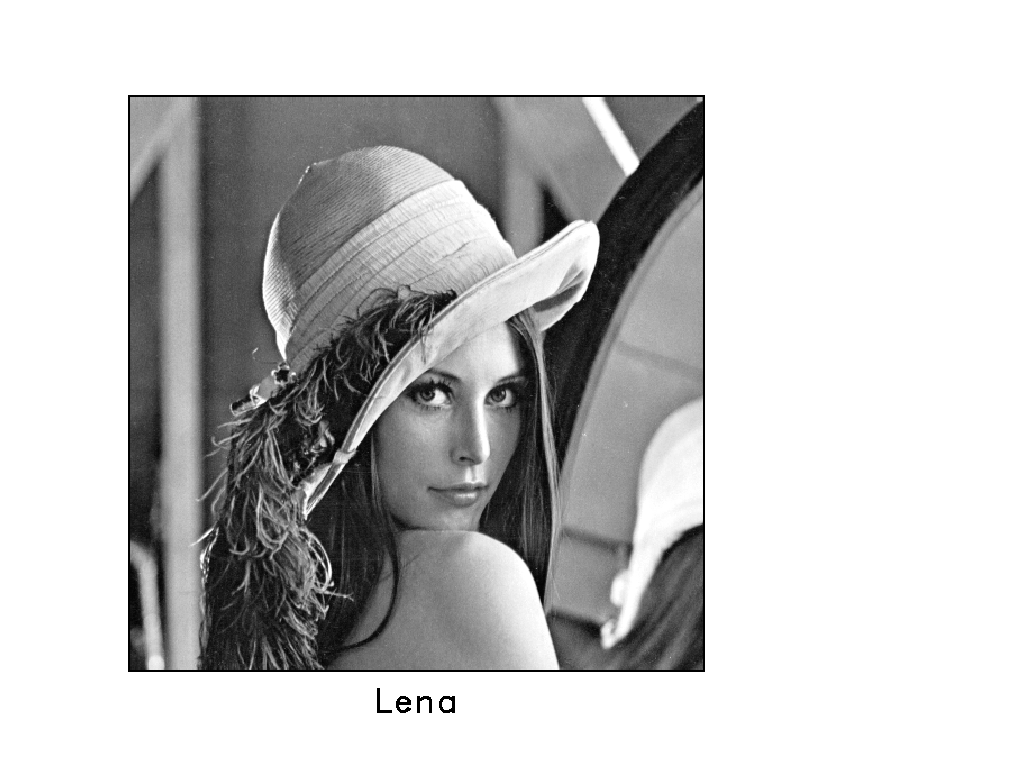

In [3]:
view('lena')

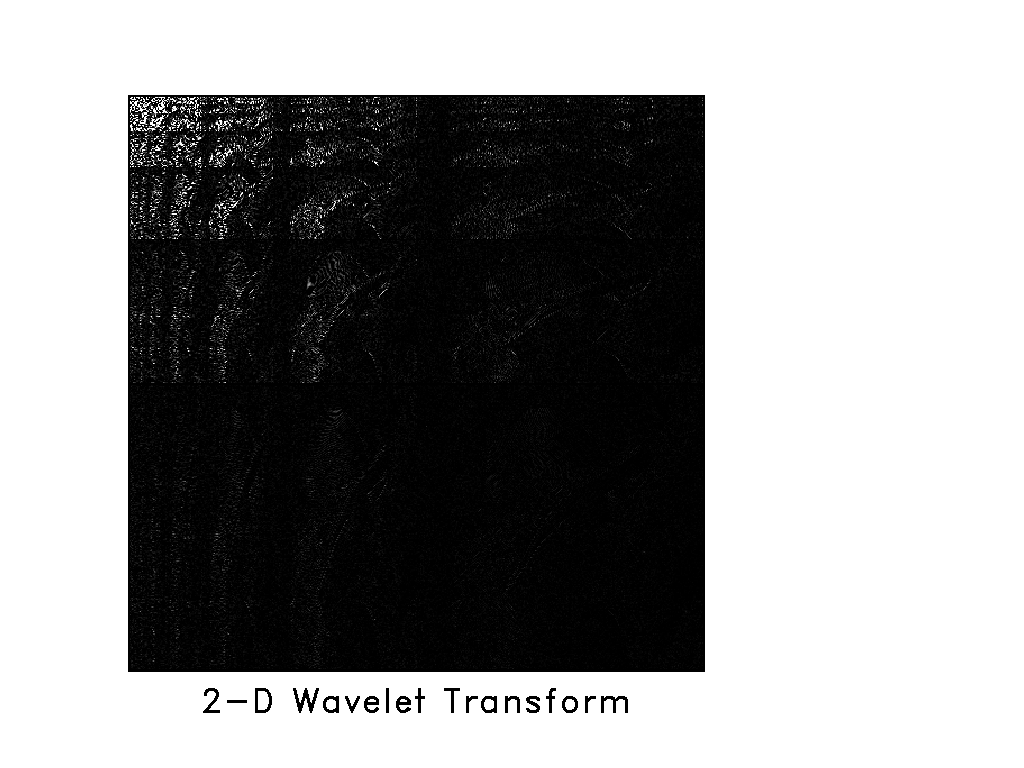

In [4]:
view('linear2')

<p id="fig:lena,linear2" style="color:navy">Figure 1: Benchmark "Lena" image from image analysis literature (a) and its 2-D digital wavelet transform using bi-orthogonal wavelets (b).</a>

Figure <a href="#fig:lena,linear2" data-reference-type="ref" data-reference="fig:lena,linear2">1</a>
shows a classic benchmark image from the image analysis literature and
its digital wavelet transform using 2-D biorthogonal wavelets. Thanks to
the general smoothness of the “Lena” image, the residual differences
from
equation <a href="#eq:r" data-reference-type="ref" data-reference="eq:r">2</a>
(stored as wavelet coefficients at different scales) have a small
dynamic range, which enables an effective compression of the image .
Wavelet compression algorithms are widely used in practice for
compression of natural images. As for compression of seismic data, the
classic DWT may not be optimal, because it does not take into account
the specific nature of seismic data patterns. In the next section, we
turn the wavelet transform into the seislet transform, which is tailored
for representing seismic data.

## From wavelets to seislets

We adopt the general idea of the lifting scheme to transforming seismic
data. The key idea of the seislet transform (Fomel, 2006) is recognizing that

-   seismic data can be organized as collections of traces or records;

-   prediction of one seismic trace or record from the other and update
    of records on the next scale should follow features characteristic
    for seismic data.

### 1-D seislet transform

The prediction and update operators employed in the lifting scheme can
be understood as digital filters. In the $Z$-transform notation, the
Haar prediction filter from
equation <a href="#eq:p1" data-reference-type="ref" data-reference="eq:p1">3</a>
is 
\begin{equation}
\label{eq:f1}
  P(Z) = Z
\end{equation}
(shifting each sample by one), and the linear interpolation
filter from
equation <a href="#eq:p" data-reference-type="ref" data-reference="eq:p">4</a>
is 
\begin{equation}
\label{eq:f}
  P(Z) = 1/2\,(1/Z+Z)\;.
\end{equation} 
These predictions are appropriate for smooth
signals but may not be optimal for a sinusoidal signal. , the prediction
\begin{equation}
\label{eq:s1}
  P(Z) = Z/Z_0\;,
\end{equation}  
where $Z_0 = e^{i\,\omega_0 \Delta t}$, perfectly
characterizes a sinusoid with $\omega_0$ circular frequency sampled on a
$\Delta t$ grid. In other words, if a constant signal ($\omega_0=0$) is
perfectly predicted by shifting each trace to its neighbor, a sinusoidal
signal ($\omega_0\ne0$) requires the shift to be modulated by an
appropriate frequency. Likewise, the linear interpolation in
equation <a href="#eq:f" data-reference-type="ref" data-reference="eq:f">9</a>
needs to be replaced by a filter tuned to a particular frequency in
order to predict a sinusoidal signal with that frequency perfectly:
\begin{equation}
\label{eq:s}
  P(Z) = 1/2\,(Z_0/Z+Z/Z_0)\;.
\end{equation} 
The analysis easily extends to
higher-order filters.

2-D seislet transform
---------------------

If we view seismic data as collections of traces, we can predict one
trace from the other by following local slopes of seismic events. Such a
prediction is a key operation in the method of plane-wave destruction (Fomel, 2002).
In fact, it is the minimization of prediction error that provides a
criterion for estimating local slopes (Claerbout, 1992). For completeness, we include a
review of plane-wave destruction in the appendix.

The prediction and update operators for a simple seislet transform are
defined by modifying the biorthogonal wavelet construction in
equations <a href="#eq:p" data-reference-type="ref" data-reference="eq:p">4</a>-<a href="#eq:u" data-reference-type="ref" data-reference="eq:u">5</a>
as follows: 
\begin{equation}
\begin{array}{rcl}
  \mathbf{P[e]}_k & = & \left(\mathbf{S}_k^{(+)}[\mathbf{e}_{k-1}] + 
  \mathbf{S}_k^{(-)}[\mathbf{e}_{k}]\right)/2 \\
  \mathbf{U[r]}_k & = & \left(\mathbf{S}_k^{(+)}[\mathbf{r}_{k-1}] + 
    \mathbf{S}_k^{(-)}[\mathbf{r}_{k}]\right)/4\;,\end{array}
\end{equation}
where
$\mathbf{S}_k^{(+)}$ and $\mathbf{S}_k^{(-)}$ are operators that predict
a trace from its left and right neighbors correspondingly by shifting
seismic events according to their local slopes. The predictions need to
operate at different scales, which, in this case, mean different
separation distances between the traces.
Equations <a href="#eq:sp" data-reference-type="ref" data-reference="eq:sp">12</a>,
in combination with the forward and inverse lifting
schemes <a href="#eq:c" data-reference-type="ref" data-reference="eq:c">1</a>-<a href="#eq:r" data-reference-type="ref" data-reference="eq:r">2</a>
and <a href="#eq:e" data-reference-type="ref" data-reference="eq:e">6</a>-<a href="#eq:o" data-reference-type="ref" data-reference="eq:o">7</a>,
provide a complete definition of the 2-D seislet transform.

In [5]:
%%file sigmoid.scons 

from rsf.recipes.seislet import seislet, diplet

Flow('sigmoid',None,
     '''
     sigmoid d1=.004 n1=200 d2=.008 n2=256 |
     smooth rect1=3 diff1=1 adj=1 | smooth rect1=3 |
     put label2=Distance
     ''')

seislet('sigmoid',200,256,d2=0.008)
diplet('sigmoid',200,256,d2=0.008,pmin=-1.35,pmax=1.35,np=401)

Overwriting sigmoid.scons


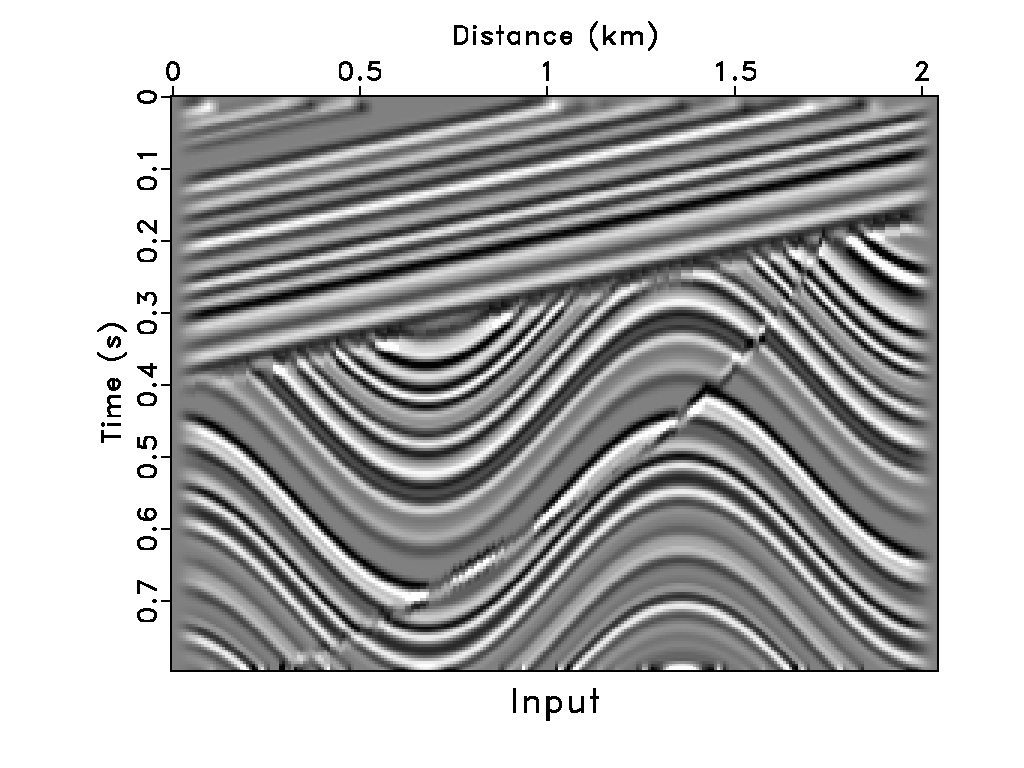

In [6]:
view('sigmoid')

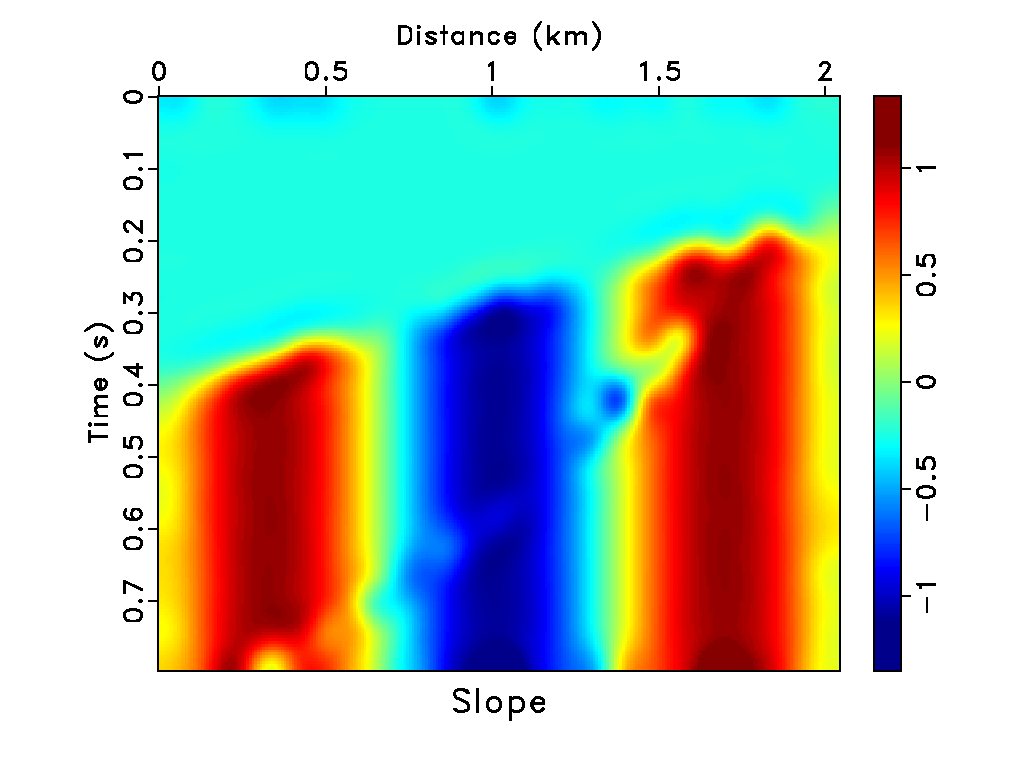

In [7]:
view('sigmoiddip')

<p id="fig:sigmoid,sigmoidip" style="color:navy">Figure 2: Synthetic seismic image (a) and local slopes estimated by plane-wave destruction
(b).</p>

Figure <a href="#fig:sigmoid" data-reference-type="ref" data-reference="fig:sigmoid">2a</a>
shows a synthetic seismic image from Claerbout (2008). After estimating local slopes
from the image by plane-wave destruction
(Figure <a href="#fig:sigmoiddip" data-reference-type="ref" data-reference="fig:sigmoiddip">2b</a>),
we applied the 2-D seislet transform described above.

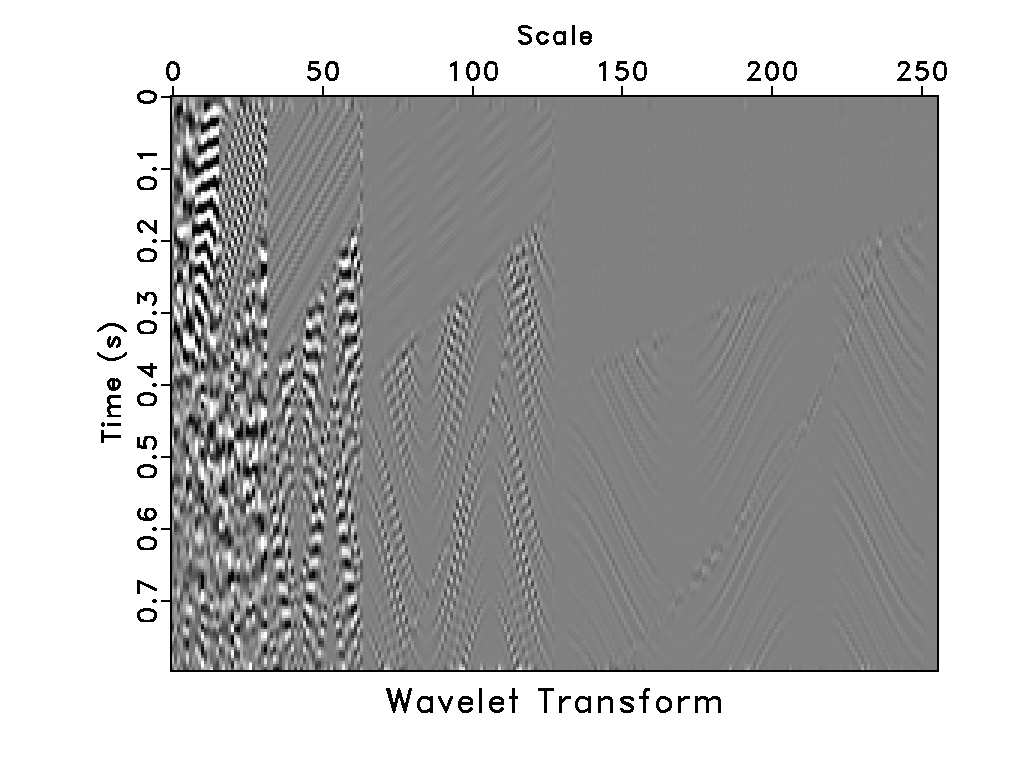

In [8]:
view('sigmoidwvlt')

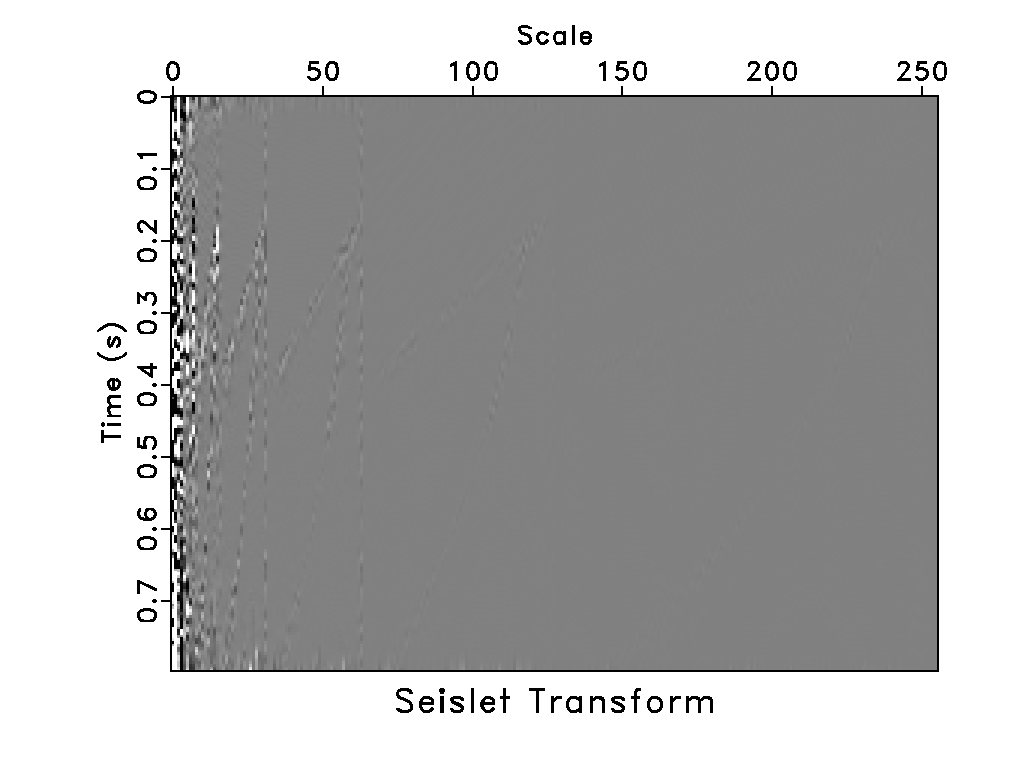

In [9]:
view('sigmoidseis')

<p id="fig:sigmoidwvlt,sigmoidseis" style="color:navy">Figure 3: Wavelet transform (a) and seislet transform (b) of the synthetic image from Figure 2.</p>

The transform is
shown in
Figure <a href="#fig:sigmoidseis" data-reference-type="ref" data-reference="fig:sigmoidseis">3b</a>
and should be compared with the corresponding wavelet transform in
Figure <a href="#fig:sigmoidwvlt" data-reference-type="ref" data-reference="fig:sigmoidwvlt">3a</a>.
Apart from the fault and unconformity regions, where the image is not
predictable by continuous local slopes, the 2-D seislet transform
coefficients are small, which enables an effective compression. In
contrast, the wavelet transform has small residual coefficients at fine
scales but develops large coefficients at coarser scales.

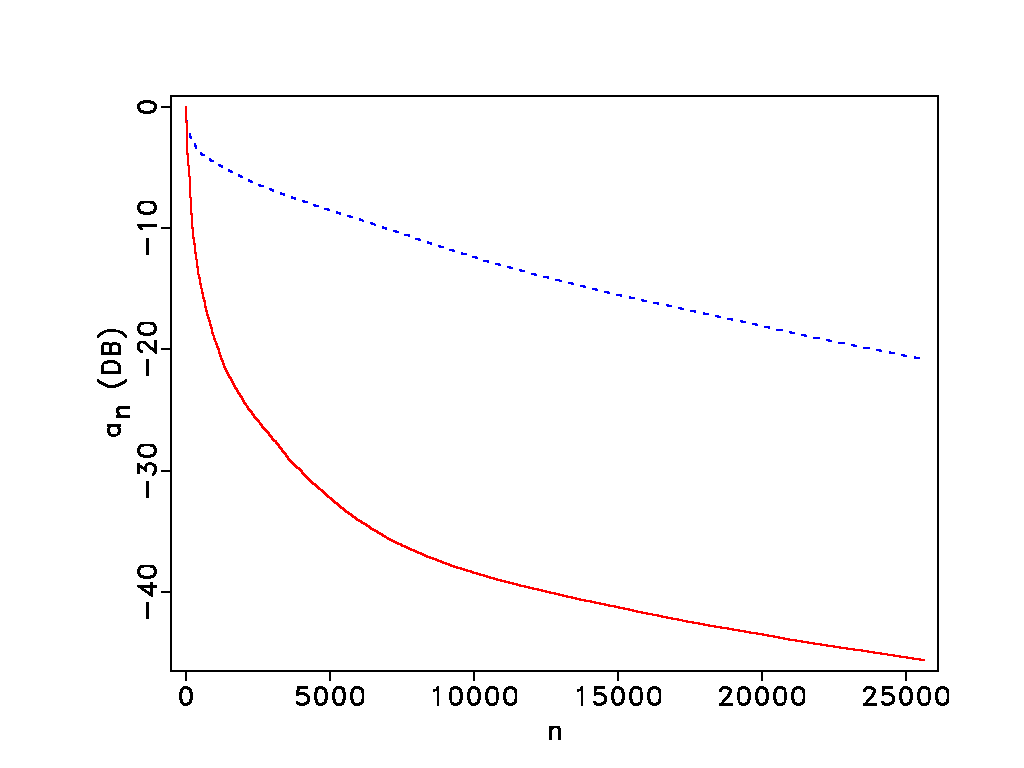

In [10]:
view('sigmoidcoef')

<p id="fig:sigmoidcoef" style="color:navy">Figure 4: Transform coe cients sorted from large to small, normalized, and plotted
on a decibel scale. Solid line: seislet transform. Dashed line: wavelet transform.</p>

Figure <a href="#fig:sigmoidcoef" data-reference-type="ref" data-reference="fig:sigmoidcoef">4</a>
shows a comparison between the decay of coefficients (sorted from large
to small) between the wavelet transform and the seislet transform. A
significantly faster decay of the seislet coefficients is evident.


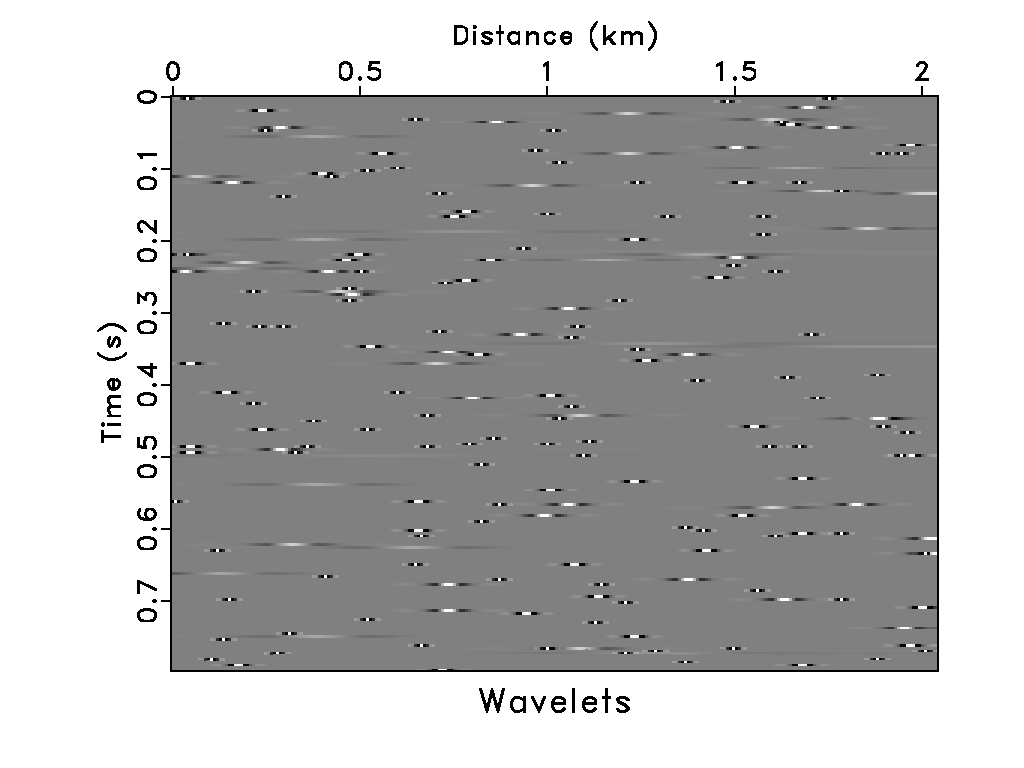

In [11]:
view('sigmoidimpw')

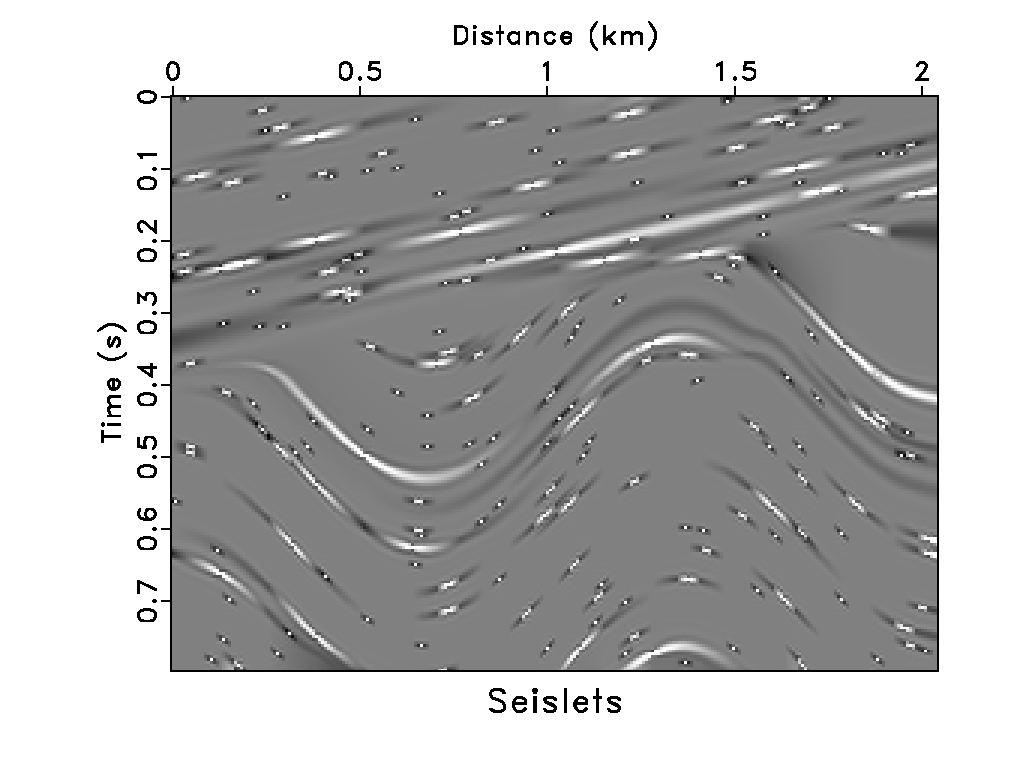

In [12]:
view('sigmoidimps')

<p id="fig:sigmoidimpw,sigmoidimps" style="color:navy">Figure 5: Randomly selected representative basis functions for wavelet transform (a)
and seislet transform (b).

Effectively, the wavelet transform in this case is equivalent to the 2-D
seislet transform with the erroneous zero slope.
Figure <a href="#fig:sigmoidimpw,sigmoidimps" data-reference-type="ref" data-reference="fig:sigmoidimpw,sigmoidimps">5</a>
shows example basis functions for the wavelet and 2-D seislet transform
used in this example. 

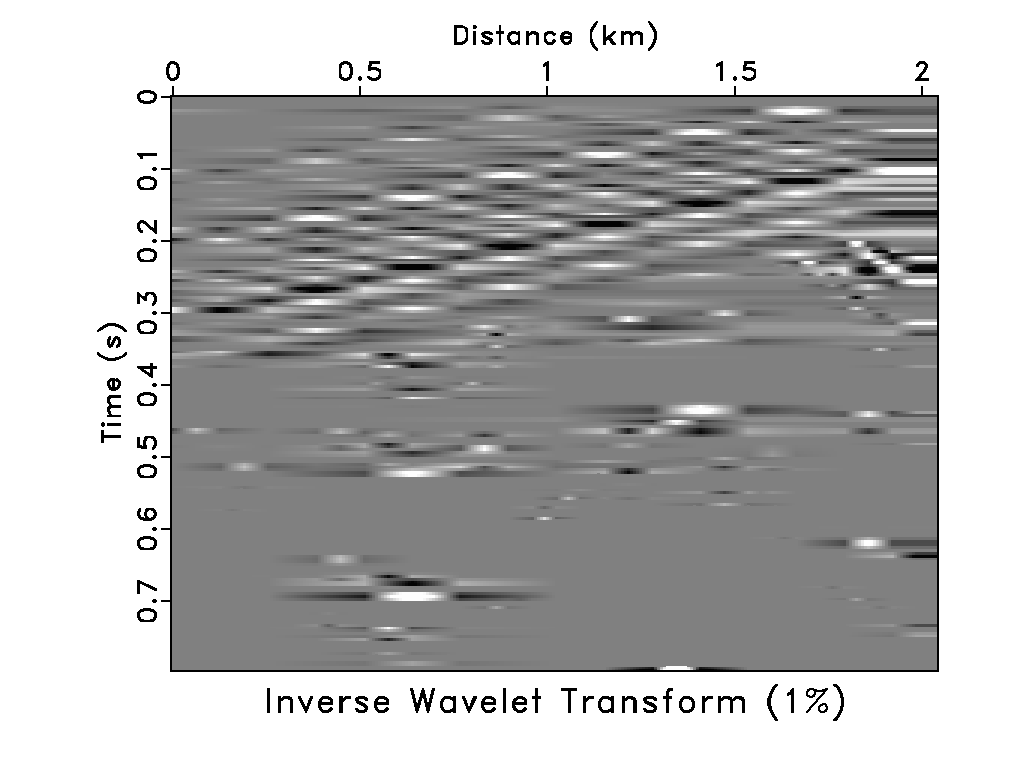

In [13]:
view('sigmoidwrec1')

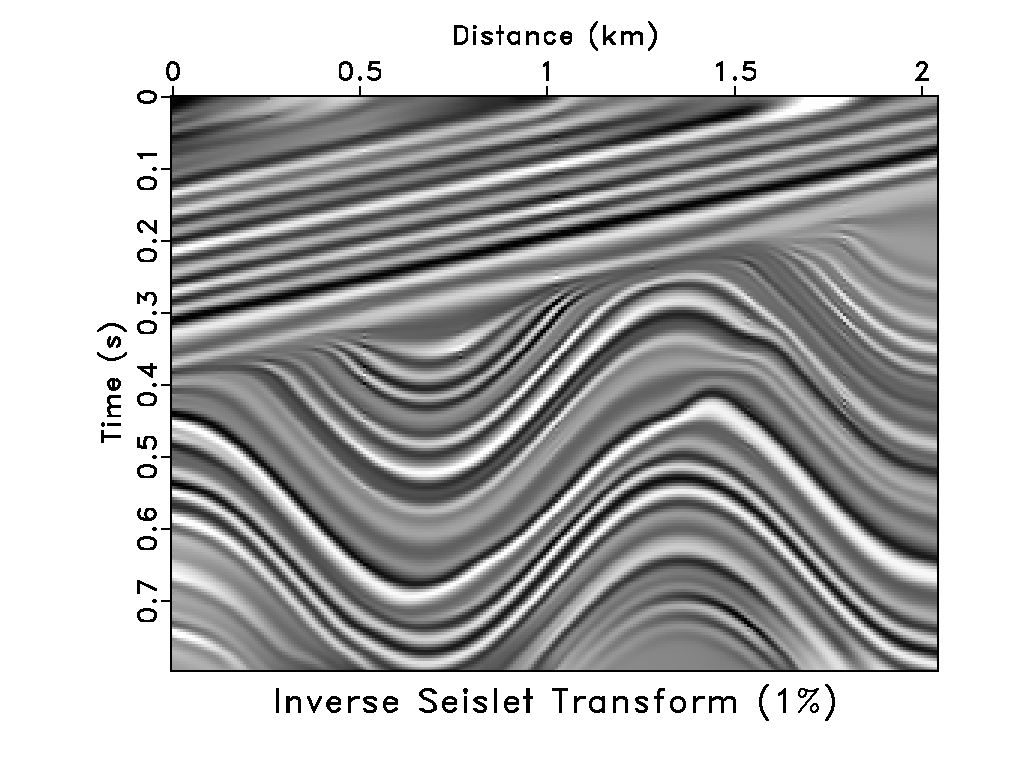

In [14]:
view('sigmoidsrec1')

<p id="fig:sigmoidwrec1,sigmoidsrec1" style="color:navy">Figure 6: Synthetic image reconstruction using only 1% of signi cant coe cients (a)
by inverse wavelet transform (b) by inverse seislet transform. Compare with Figure 2a.</p>

If using only a small number of the most
significant coefficients, the wavelet transform fails to reconstruct the
most important features of the original image, while the 2-D seislet
transform achieves an excellent reconstruction
(Figure <a href="#fig:sigmoidwrec1,sigmoidsrec1" data-reference-type="ref" data-reference="fig:sigmoidwrec1,sigmoidsrec1">6</a>).
We use the method of soft thresholding (Donoho, 1995) for selecting the most significant coefficients.

## Example applications of 2-D seislet transform

In this section, we discuss some example applications of the 2-D seislet
transform.

### Denoising and trace interpolation

Figure <a href="#fig:gath" data-reference-type="ref" data-reference="fig:gath">7a</a>
shows a common-midpoint gather from a North Sea dataset. 

In [15]:
%%file gath.scons

from rsf.recipes.beg import server as private

Fetch('elf0.H', 'elf', private)

Flow('elf', 'elf0.H',
     '''
     dd form=native | cut n3=1 n2=1 n1=300 f3=663 f2=67 |
     bandpass flo=5 fhi=60
     ''')

Flow('gath', 'elf', 'window n2=128 n3=1 f3=500 | put d2=0.0125 o2=0.05')

data='gath'
n1=800
n2=128          # data dimensions
o2=50
d2=12.5         # lateral scale
rect1=10
rect2=10        # smoothing for dip estimation
p0=0
pmin=0          # initial and minimum dips
clip=5          # clip percentile
eps=0.1         # regularization
nsp=200         # number of spikes

Result(data, 'grey unit1=s unit2=km  title=Input')

dip = data+'dip'
Flow(dip,data,
     'dip rect1=%d rect2=%d p0=%g pmin=%g' % (rect1,rect2,p0,pmin))
Result(dip,
       '''
       grey unit1=s unit2=km  color=j title=Slope allpos=y scalebar=y
       ''')

Overwriting gath.scons


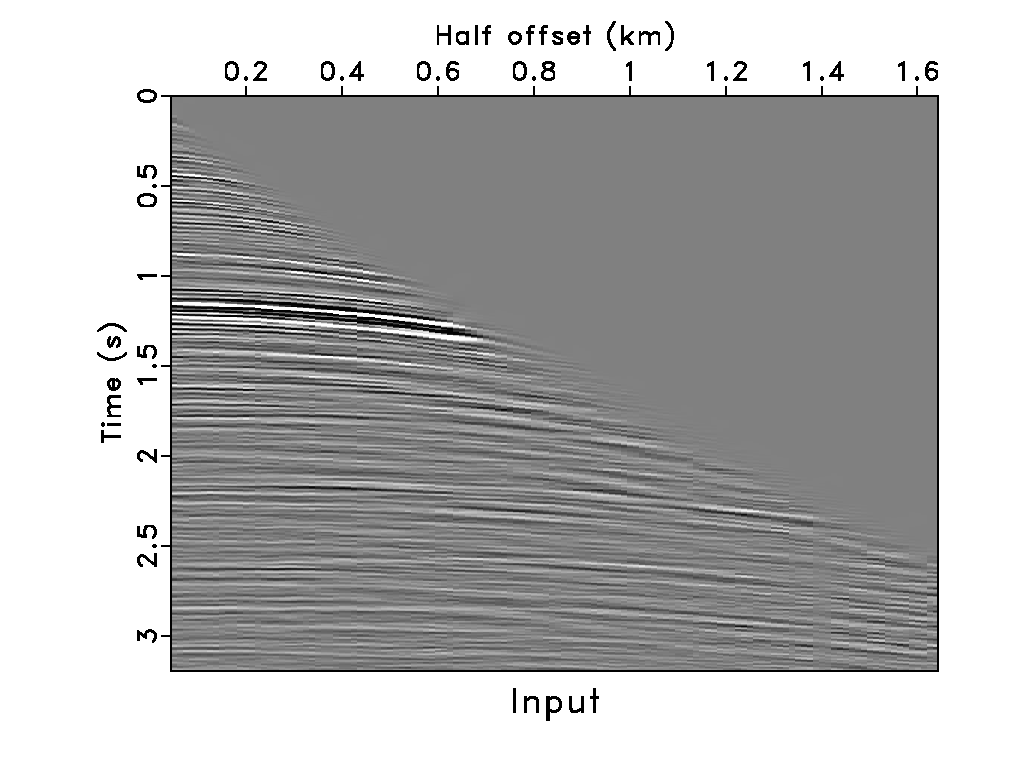

In [16]:
view('gath')

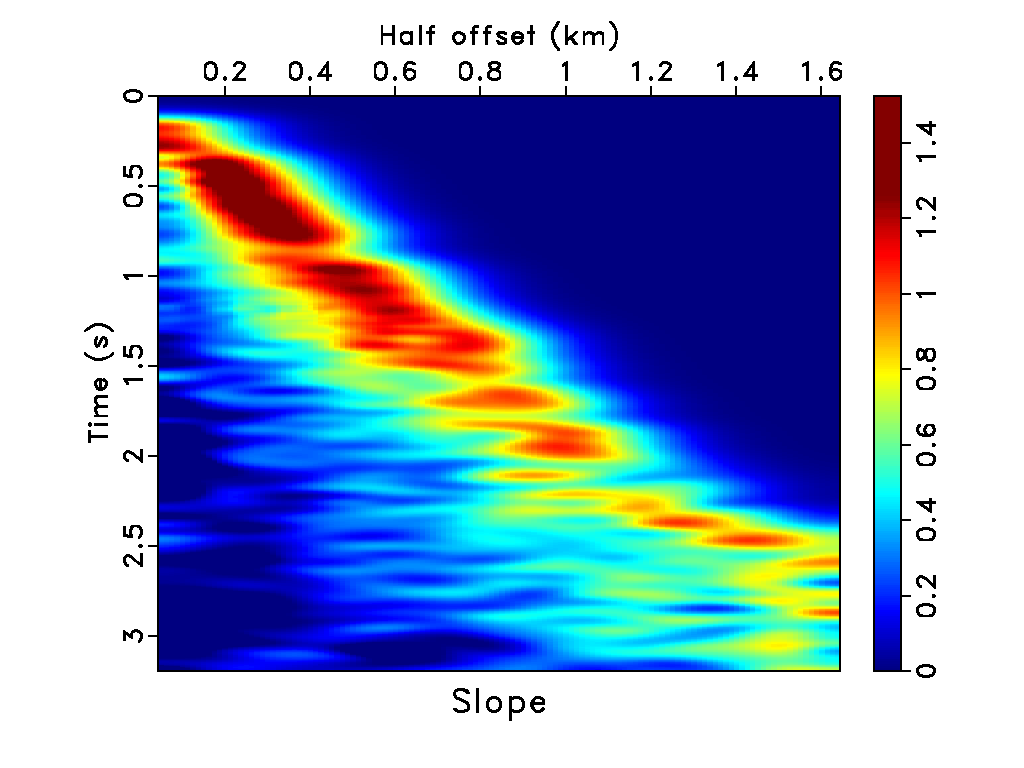

In [17]:
view('gathdip')

<p id="fig:gath,gathdip" style="color:navy">Figure 7: Common-midpoint gather (a) and local slopes estimated by plane-wave
destruction (b).</p>

Plane-wave
destruction estimates local slopes shown in
Figure <a href="#fig:gathdip" data-reference-type="ref" data-reference="fig:gathdip">7b</a>
and enables the 2-D seislet transform shown in
Figure <a href="#fig:gathseis" data-reference-type="ref" data-reference="fig:gathseis">8</a>.
Small dynamic range of seislet coefficients implies a good compression
ratio.

In [18]:
%%file gathseis.scons

seis = data+'seis'
Flow(seis, [data, dip],
     'seislet dip=${SOURCES[1]} eps=%g adj=y inv=y unit=y' % eps)
Result(seis,
       '''
       put o2=0 d2=1 | 
       grey unit1=s title="Seislet Transform" label2=Scale unit2=
       ''')

for c in (1,clip,25):
    rec = '%ssrec%d' % (data,c)
    
    Flow(rec,[seis,dip],
         '''
         threshold pclip=%d |
         seislet dip=${SOURCES[1]} eps=%g inv=y unit=y
         ''' % (c,eps))
    Result(rec,
           '''
           mutter v0=1.3 |
           grey unit1=s unit2=km  title="Inverse Seislet Transform (%d%%)"
           ''' % c)

Overwriting gathseis.scons


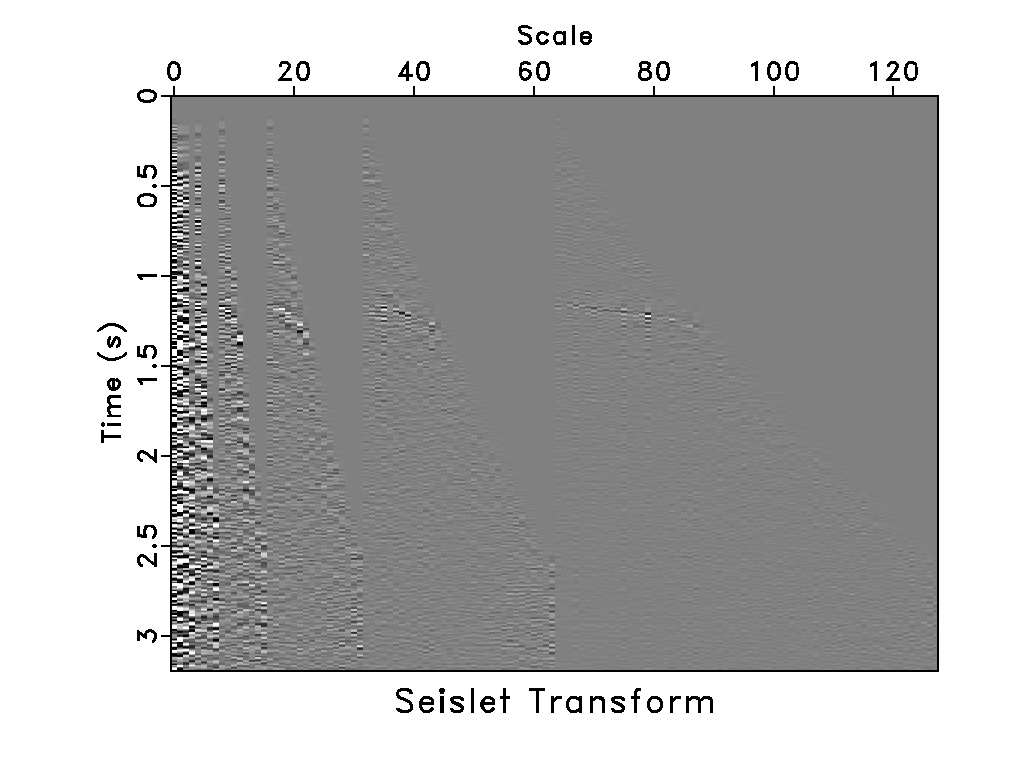

In [19]:
view('gathseis')

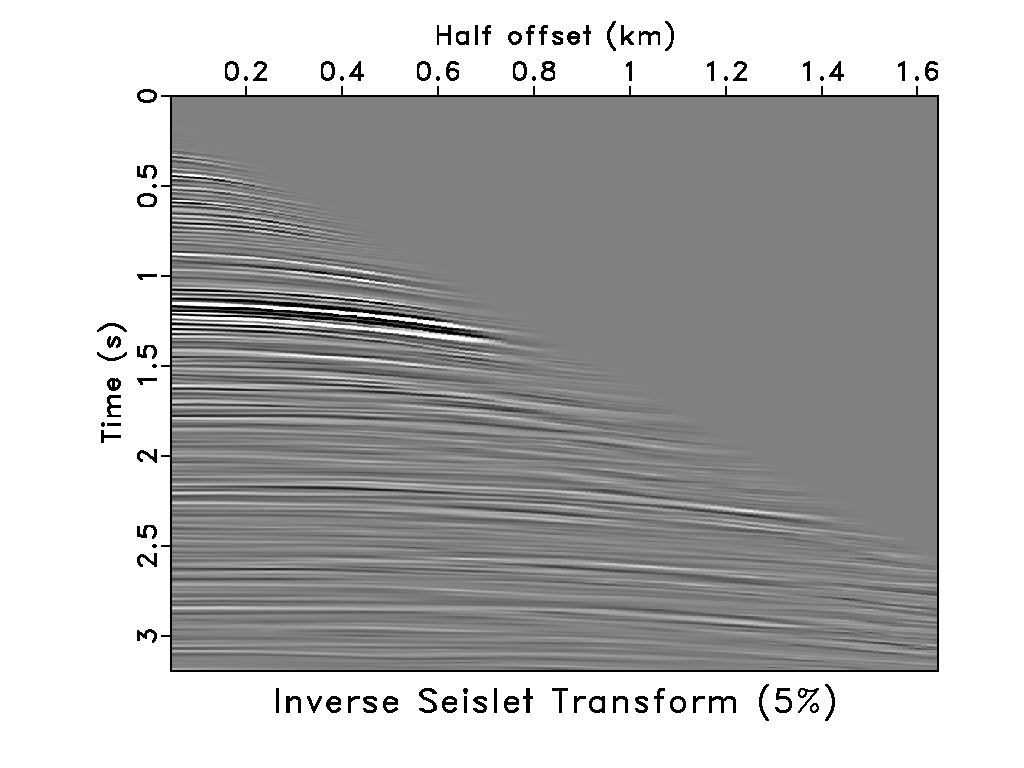

In [20]:
view('gathsrec5')

<p id="fig:gath,gathdip" style="color:navy">Figure 8: Seislet transform of the input gather (a) and data reconstruction using only 5% of significant seislet coefficients (b).</p>

Figure <a href="#fig:gathsrec5" data-reference-type="ref" data-reference="fig:gathsrec5">8b</a>
shows data reconstruction using only 5% of the significant seislet coefficients.

In [21]:
%%file seislet2.scons

import math

max=int(math.log(n2)/math.log(2))
for m in range(max):
    scale = int(math.pow(2,m))
    slet = '%sslet%d' % (data,scale)
    Flow(slet,[seis,dip],
         '''
         cut f2=%d | 
         seislet dip=${SOURCES[1]} eps=%g inv=y unit=y
         ''' % (scale,eps))
    Result(slet,
           'mutter v0=1.3 | grey unit1=s unit2=km  title="Denoising result" ')

slet = '%sslet%d' % (data,16)

Result('sign',[slet,dip],
     '''
     seislet dip=${SOURCES[1]} eps=%g adj=y inv=y unit=y |
     put o2=0 d2=1 | 
     grey unit1=s title="Seislet Transform" label2=Scale unit2=
     ''' % eps)

Overwriting seislet2.scons


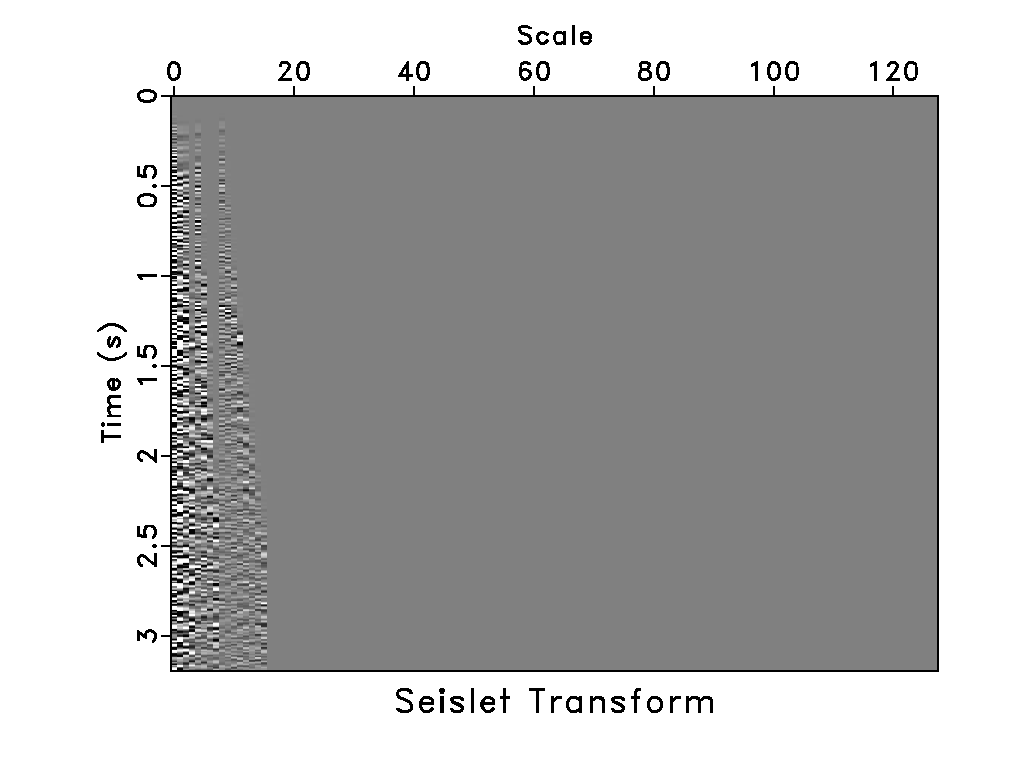

In [22]:
view('sign')

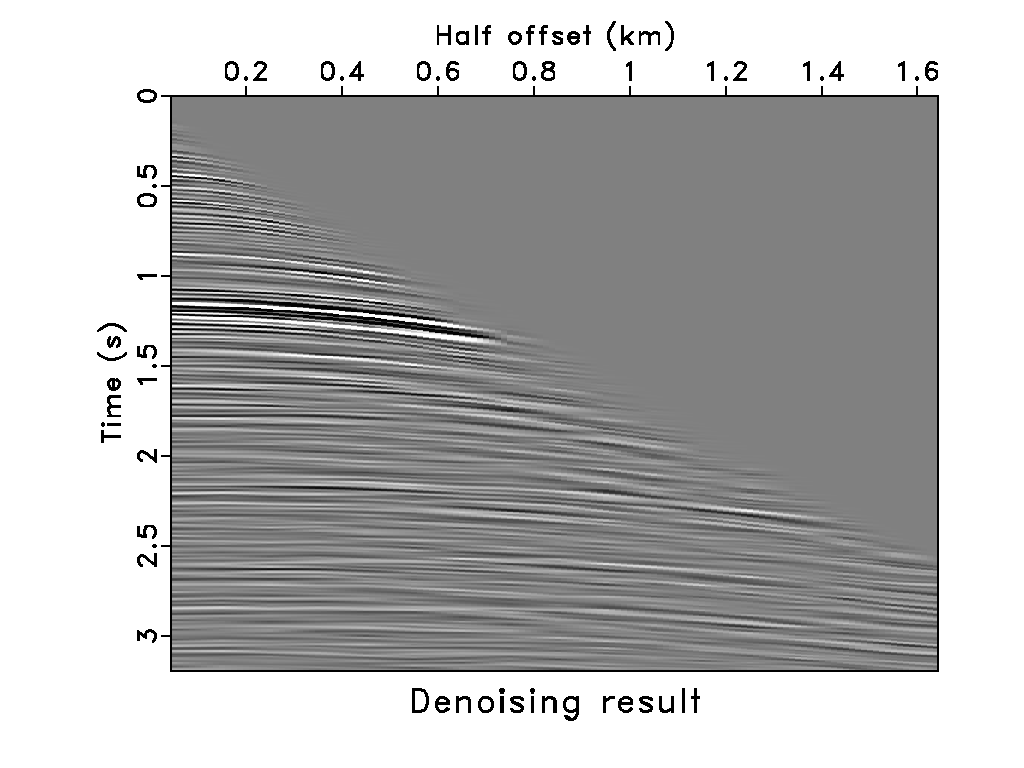

In [23]:
view('gathslet16')

<p id="fig:sign,gathslet16" style="color:navy">Figure 9: Zeroing seislet difference coeffcients at fine scales (a) enables effective denoising of the reconstructed data (b).</p>

If we choose the significant coefficients at the coarse scale and zero
out difference coefficients at the finer scales, the inverse transform
will effectively remove incoherent noise from the gather
(Figure <a href="#fig:gathseis,gathsrec5" data-reference-type="ref" data-reference="fig:gathseis,gathsrec5">8</a>).
Thus, denoising is a naturally defined operation in the 2-D seislet
domain
(Figure <a href="#fig:sign,gathslet16" data-reference-type="ref" data-reference="fig:sign,gathslet16">9</a>).

In [24]:
%%file seislet4.scons

Flow('rand', seis, 'noise rep=y var=200000 seed=2006 | mutter v0=1.3')

Flow('seis2', [seis, 'rand'], 'cat axis=2 ${SOURCES[1]} | put d2=0.00625')
Plot('seis2', 'grey unit1=s title="Seislet Transform" label2=Scale unit2=')

Flow('dip2', dip,
     'transp | remap1 d1=0.00625 o1=0.050 n1=256 | transp | scale dscale=0.5')
Flow('gath2', 'seis2 dip2',
     'seislet dip=${SOURCES[1]} eps=%g inv=y unit=y' % eps)
Plot('gath2',
     '''
     window n2=255 | mutter v0=1.2 |
     grey unit1=s unit2=km title="Resampled by 2"
     ''')

Flow('rand2', 'seis2', 'noise rep=y var=200000 seed=2006 | mutter v0=1.3')

Flow('seis4', 'seis2 rand2', 'cat axis=2 ${SOURCES[1]} | put d2=0.003125')
Result('seis4',
       '''
       put o2=0 d2=1 | 
       grey unit1=s title="Seislet Transform" label2=Scale unit2=
       ''')

Overwriting seislet4.scons


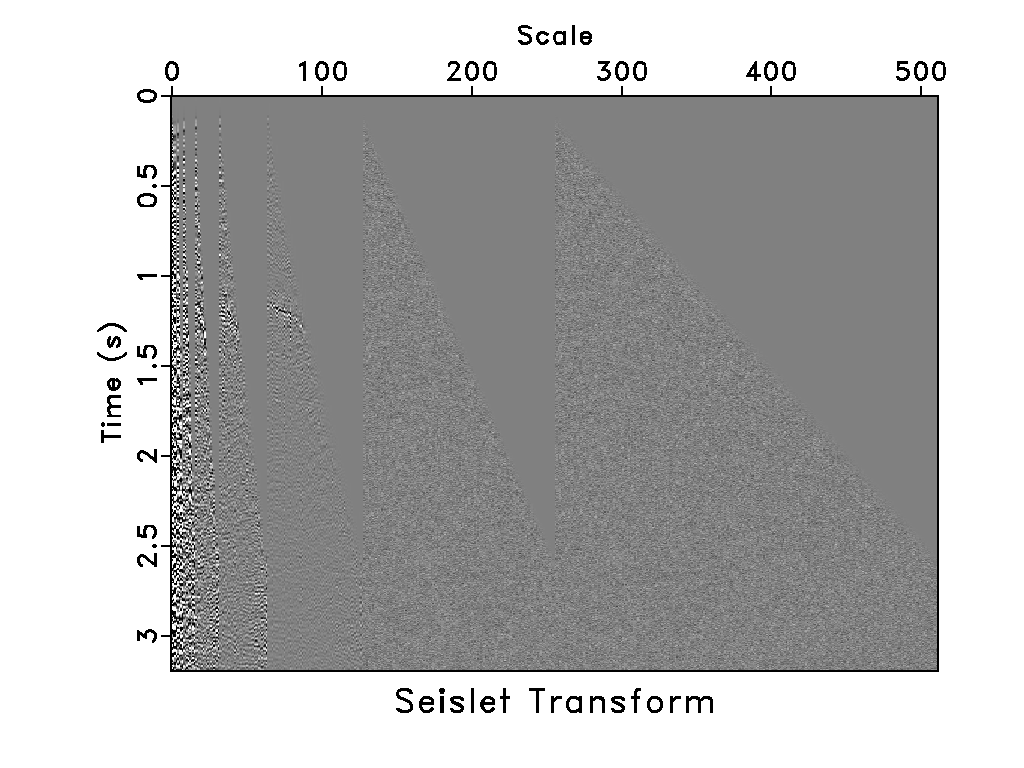

In [25]:
view('seis4')

In [26]:
%%file gath4.scons

Flow('dip4', 'dip2',
     'transp | remap1 d1=0.003125 o1=0.05 n1=512 | transp | scale dscale=0.5')
Flow('gath4', 'seis4 dip4',
     'seislet dip=${SOURCES[1]} eps=%g inv=y unit=y' % eps)
Result('gath4',
       '''
       window n2=509 | mutter v0=1.2 |
       grey unit1=s unit2=km title="Resampled by 4"
       ''')

Overwriting gath4.scons


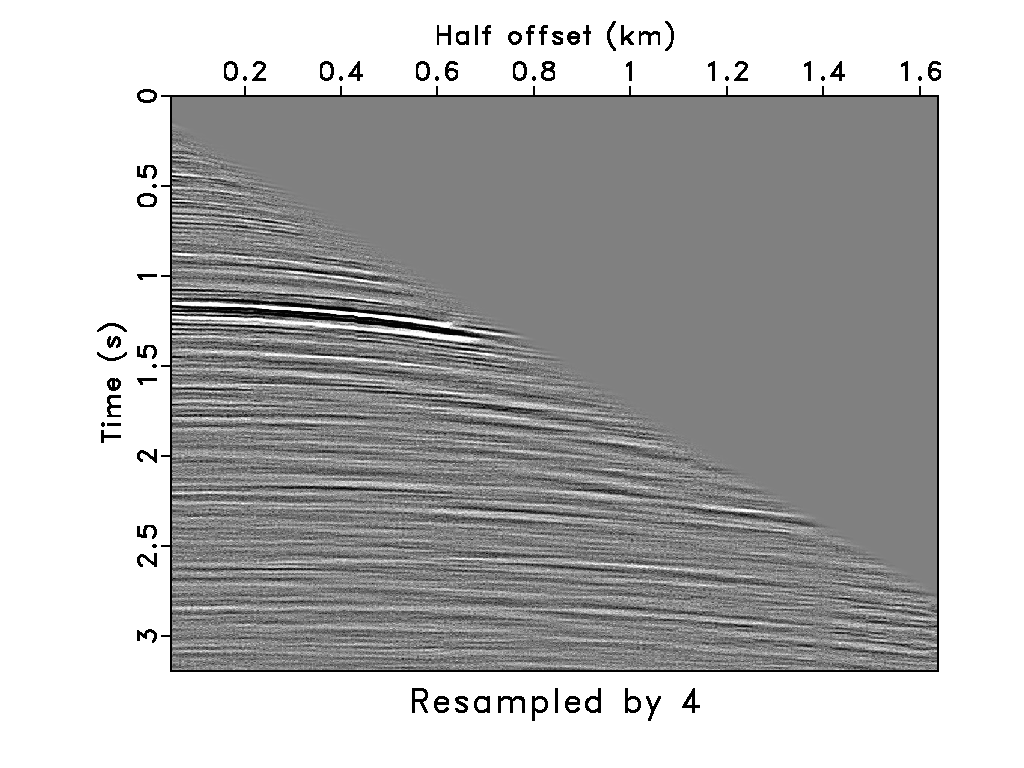

In [27]:
view('gath4')

<p id="fig:seis4,gath4" style="color:navy">Figure 10: Extending seislet transform with random noise (a) enables trace interpolation in the reconstructed data. The interpolated section (b) has 4 times more traces than the original shown in Figure 7a.</p>

If we extend the seislet domain and interpolate the smooth local slope
to a finer grid, the inverse seislet transform will accomplish trace
interpolation of the input gather
(Figure <a href="#fig:seis4,gath4" data-reference-type="ref" data-reference="fig:seis4,gath4">10</a>).
We extend not simply with zeros but with small random noise to account
for the fact that realistic noise is unpredictable and therefore exists
on different scale levels. In this example, the number of traces is
increased by four. Thus, trace interpolation also turns out to be a
natural operation when viewed from the 2-D seislet domain.

### Seislet stack

The seislet transform acquires a special meaning when applied in the
offset direction on common midpoint or common image point gathers.
According to the lifting construction, the zero-order seislet
coefficient is nothing more than seismic stack computed in a recursive
manner by successive partial stacking of neighboring traces. As a
consequence, seislet stack avoids the problem of “NMO stretch”
associated with usual stacking (Haldorsen and Farmer, 1989) as well as the problem of nonhyperbolic
moveouts (Fomel and Grechka, 2001). All other gather attributes including multiple reflections
and amplitude variation with offset appear in the higher order seislet
coefficients.

In [28]:
%%file sstack.scons

Flow('gaths', 'elf', 'window n2=128')

Flow('pat', 'gaths', 'patch w=800,128,150')
Flow('dips', 'pat',
     'dip n4=0 rect1=10 rect2=10 rect3=10 p0=0 pmin=0', split=[6, 11])
Flow('dip', 'dips', 'patch inv=y weight=y')

Flow('seis', 'gaths dip',
     'seislet dip=${SOURCES[1]} eps=%g adj=y inv=y unit=y' % eps)

Flow('sstack', 'seis', 'window n2=1')

Plot('sstack',
     '''
     put d2=0.0133333 |
     grey label2=Midpoint unit2=km label1=Time unit1=s
     title="Seislet Stack"
     ''')

Fetch('elf-stk.rsf', 'masha')

Plot('stack', 'elf-stk.rsf',
     '''
     dd form=native | put d2=0.0133333 |
     grey label2=Midpoint unit2=km label1=Time unit1=s
     title="NMO Stack"
     ''')

Result('sstack', 'stack sstack', 'SideBySideAniso')

Overwriting sstack.scons


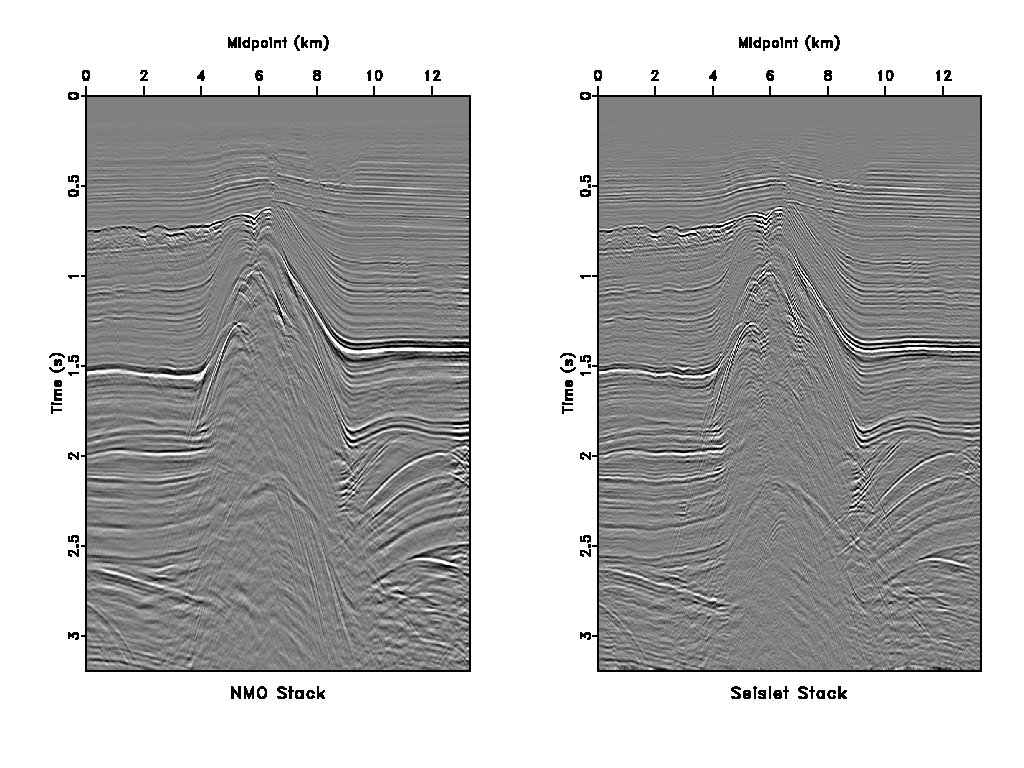

In [29]:
view('sstack')

<p id="fig:sstack" style="color:navy">Figure 11: Left: conventional normal-moveout stack. Right: seislet stack.</p>

Figure <a href="#fig:sstack" data-reference-type="ref" data-reference="fig:sstack">11</a>
shows a comparison between the conventional normal moveout stack and the
seislet stack. The higher resolution of the seislet stack is clearly
visible.

In [30]:
%%file nmo.scons

Flow('scn', 'gath',
     'mutter v0=%g | vscan semblance=y v0=%g nv=%d dv=%g' % (1.4, 1.4, 120, 0.025))
Flow('vel', 'scn', 'pick rect1=50 | window')
Flow('nmo', 'gath vel',
     'mutter v0=%g | nmo velocity=${SOURCES[1]} str=0' % 1.4)

Result('nmo', 'grey unit1=s unit2=km title="Normal Moveout" ')

Overwriting nmo.scons


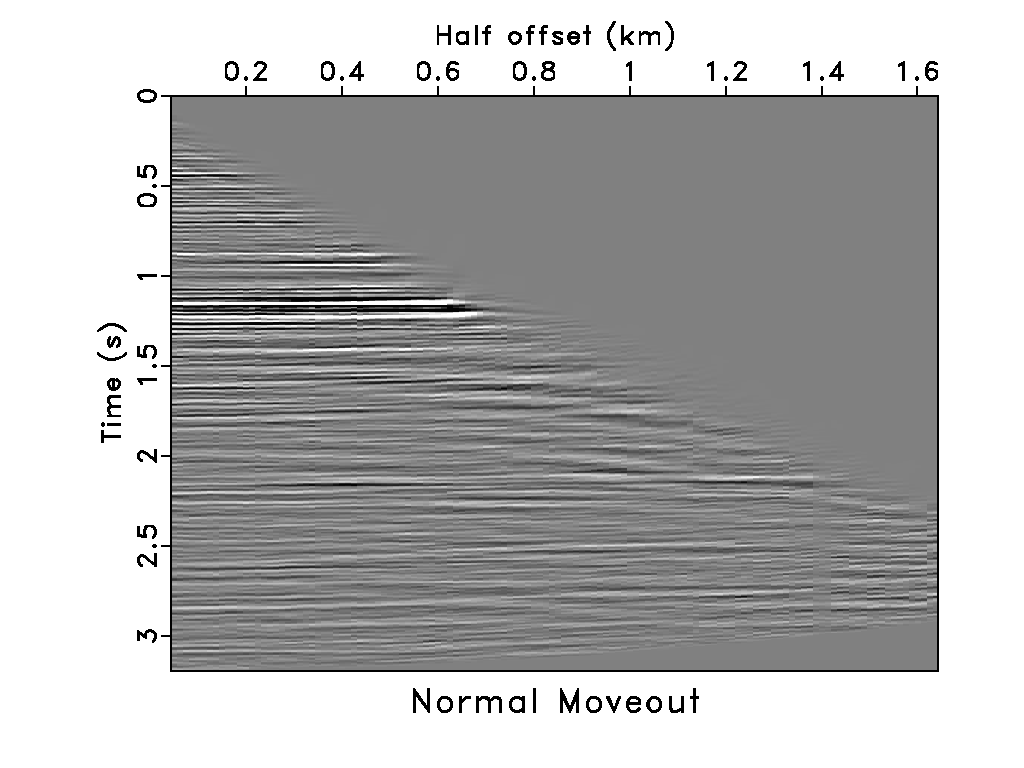

In [31]:
view('nmo')

In [32]:
%%file snmo.scons 

import random

random.seed(2005)

def rnd(x):
    global nr
    r = str(random.randint(1,nr))
    return r

nr = n1
k1 = ','.join([rnd(x) for x in range(nsp)])
nr = n2
k2 = ','.join([rnd(x) for x in range(nsp)])

imps = data+'imps'
Flow(imps,dip,
     '''
     spike nsp=%d k1=%s k2=%s n1=%d n2=%d o2=%g d2=%g label2="Half offset" |
     seislet dip=$SOURCE eps=%g inv=y unit=y
     ''' % (nsp,k1,k2,n1,n2,o2,d2,eps),stdin=0)
Result(imps,'mutter v0=1.3 | grey unit1=s unit2=m  title=Seislets')

    
impw = data+'impw'
Flow(impw,dip,
     '''
     spike nsp=%d k1=%s k2=%s n1=%d n2=%d o2=%g d2=%g label2="Half offset" |
     transp | dwt eps=%g adj=y inv=y unit=y | transp
     ''' % (nsp,k1,k2,n1,n2,o2,d2,eps),stdin=0)
Result(impw,'mutter v0=1.3 | grey unit1=s unit2=m  title=Wavelets')

nmos = []
for i2 in range(n2):
    trace = 'trace%d' % i2
    if i2 == 0:
        Flow(trace,'gath','cut f2=1')
    elif i2 == n2-1:
        Flow(trace,'gath','cut n2=%d' % i2)
    else:
        Flow(trace,'gath','cut n2=%d | cut f2=%d' % (i2,i2+1))

    nmo = 'nmo%d' % i2
    nmos.append(nmo)
    Flow(nmo,[trace,dip],
         '''
         seislet dip=${SOURCES[1]} eps=%g adj=y inv=y unit=y type=haar |
         window n2=1         
         ''' % eps)

Flow('snmo',nmos,
     '''
     cat axis=2 ${SOURCES[1:%d]} 
     ''' % len(nmos))

Result('snmo','grey unit1=s unit2=km title="Seislet Moveout" ')

Overwriting snmo.scons


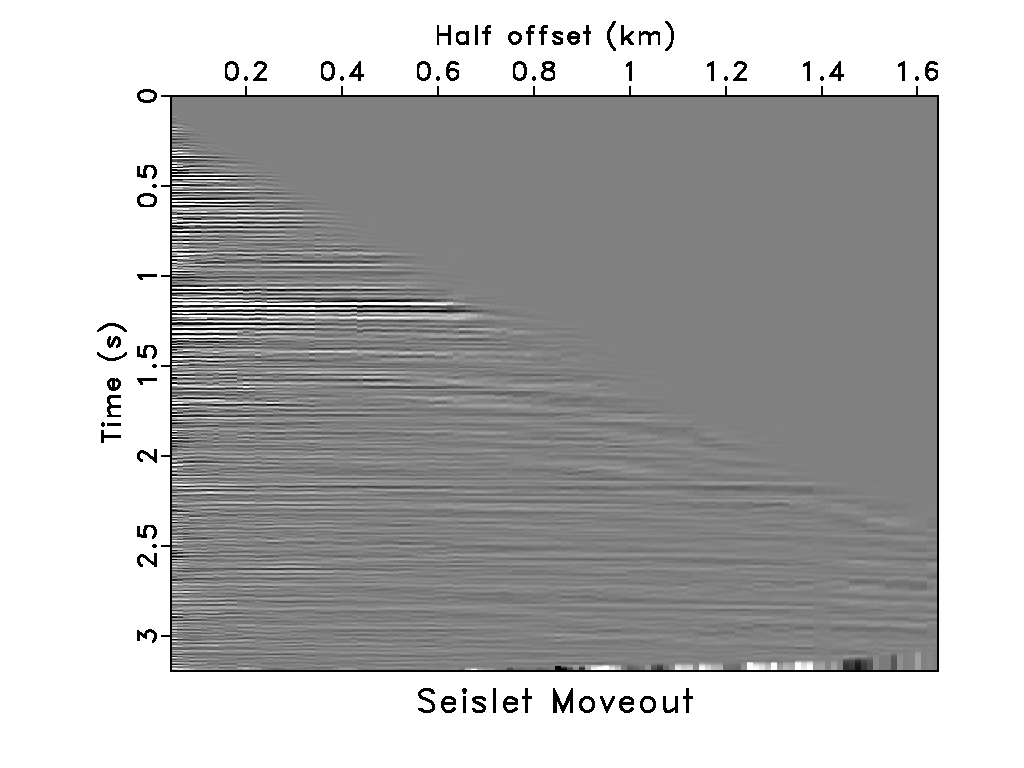

In [33]:
view('snmo')

<p id="fig:nmo,snmo" style="color:navy">Figure 12: Input gather after normal moveout correction (a) and e ective seislet moveout (b).</p>

Figure <a href="#fig:nmo,snmo" data-reference-type="ref" data-reference="fig:nmo,snmo">12</a>
compares the common-midpoint gather after conventional normal moveout
correction and an effective seislet moveout computed by separating
contributions from individual traces to the seislet stack.

## From transform to frame

The 1-D and 2-D transforms, defined in the previous sections, are
appropriate for analyzing signals, which have a single dominant sinusoid
or plane-wave component. In practice, it is common to analyze signals
composed of multiple sinusoids (in 1-D) or plane waves (in 2-D). If a
range of frequencies or plane-wave slopes is chosen, and the appropriate
transform is constructed for each of them, all the transform domains
taken together will constitute an overcomplete representation or a frame
(Mallat, 2009).

Mathematically, if $\mathbf{F}_n$ is the orthonormal seislet transform
for $n$-th frequency or plane wave, then, for any data vector
$\mathbf{d}$, 
\begin{equation}
\label{eq:frame}
\sum\limits_{n=1}^N \|\mathbf{F}_n\,\mathbf{d}\|^2 = \sum\limits_{n=1}^N \mathbf{d}^T\,\mathbf{F}_n^T\,\mathbf{F}_n\,\mathbf{d} =
\sum\limits_{n=1}^N \|\mathbf{d}\|^2 = N\,\|\mathbf{d}\|^2\;, 
\end{equation}
which
means that all transforms taken together constitute a *tight frame* with
constant $N$.

For example, in the 1-D case, one can find appropriate frequencies by
autoregressive spectral analysis (Burg, 1975; Marple, 1987). We define the algorithm for the *1-D
seislet frame* as follows:

1.  Select a range of coefficients $Z_1, Z_2, \ldots, Z_k$. When using
    autoregressive spectral analysis, these coefficients are simply the
    roots of the prediction-error filter. Alternatively, they can be
    defined from an appropriate range of frequencies
    $\omega_1, \omega_2, \ldots, \omega_k$.

2.  For each of the coefficients, perform the 1-D seislet transform.

Because of its over-completeness, a frame representation for a given
signal is not unique. In order to assure that different frequency
components do not leak into other parts of the frame, it is advantageous
to employ sparseness-promoting inversion. We adopt a nonlinear shaping
regularization scheme (Fomel, 2008), analogous to the sparse inversion method of Daubechies et al. (2004),
and define sparse decomposition as an iterative process
\begin{equation}
  \label{eq:shape4}
  \begin{array}{rcl}
  \widehat{\mathbf{f}}_{k+1} & = & \mathbf{S}[\mathbf{F}\,\mathbf{d}+(\mathbf{I}-\mathbf{F}\,
   \mathbf{F}')\,\widehat{\mathbf{f}}_{k}]\;, \\
   \mathbf{f}_{k+1} & = & \mathbf{f}_k + \mathbf{F}\,\mathbf{d}- \mathbf{F}\,\mathbf{F}' \widehat{\mathbf{f}}_{k+1}\;,
   \end{array}
\end{equation}   
where $\mathbf{f}_k$ is the
seislet frame at $k$-th iteration, $\mathbf{d}$ is input data,
$\mathbf{I}$ is the identity operator, $\mathbf{F}$ and $\mathbf{F}'$
are frame construction and deconstruction operators 
\begin{equation}
\begin{array}{rcl}
  \mathbf{F} & \equiv & 
\left[\begin{array}{cccc}\mathbf{F}_1 &\mathbf{F}_2 & 
    \cdots &\mathbf{F}_k\end{array}\right]^T\;, \\
\mathbf{F}' & \equiv &  
\left[\begin{array}{cccc}\mathbf{F}_1^{-1} &\mathbf{F}_2^{-1} & 
    \cdots &\mathbf{F}_k^{-1}\end{array}\right]\;,\end{array}
\end{equation}    
where
$\mathbf{F}_j$ is the seislet transform for an individual frequency, and
$\mathbf{S}$ is a nonlinear shaping operator, such as soft thresholding (Donoho, 1995).. The
iteration <a href="#eq:shape4" data-reference-type="ref" data-reference="eq:shape4">14</a>
starts with $\mathbf{f}_0=\mathbf{0}$ and and is related to the
linearized Bregman iteration (Osher et al., 2005; Yin et al., 2008). We find that a small number of iterations
is usually sufficient for convergence and achieving both model sparseness and data recovery.

### 1-D data analysis with 1-D seislet frame

We use a simple synthetic test to verify the compression effectiveness
of 1-D seislet frame. A test signal mixing two sinusoids with different
frequencies and some random noise is displayed in
Figure <a href="#fig:tatrace" data-reference-type="ref" data-reference="fig:tatrace">13a</a>. We use a prediction-error filter to detect the signal frequencies and to
design the corresponding seislet frame. The result is shown in
Figure <a href="#fig:taft" data-reference-type="ref" data-reference="fig:taft">13b</a>.
The 1-D seislet frame algorithm with shaping regularization compresses
the sinusoidal signal into two nearly perfect impulses with some
dispersive random noise. For comparison, we also apply DFT and DWT to
transform the signal
(Figures <a href="#fig:fourier" data-reference-type="ref" data-reference="fig:fourier">13c</a>
and
 <a href="#fig:tdwt" data-reference-type="ref" data-reference="fig:tdwt">13d</a>).

In [34]:
%%file tatrace.scons

import math

#Create regular sinusoid signal with two frequencies
f0 = 1/(2*math.pi)
f1 = 0.2/(2*math.pi)

# Make analytical trace
Flow('tatrace', None,
     '''
     math n1=128 d1=1 o1=1 type=complex 
     output="2.5*exp(I*(%g*x1+%g))+5*exp(I*(%g*x1+%g))" |
     dd type=float | noise var=0.05 seed=1234 | dd type=complex
     ''' % (2*math.pi*f0, 2*math.pi*f0,
            2*math.pi*f1, 0))
Result('tatrace',
       'imag | dots label1=Sample unit1= title="Synthetic Mixed Sinusoidal Signal"')

Overwriting tatrace.scons


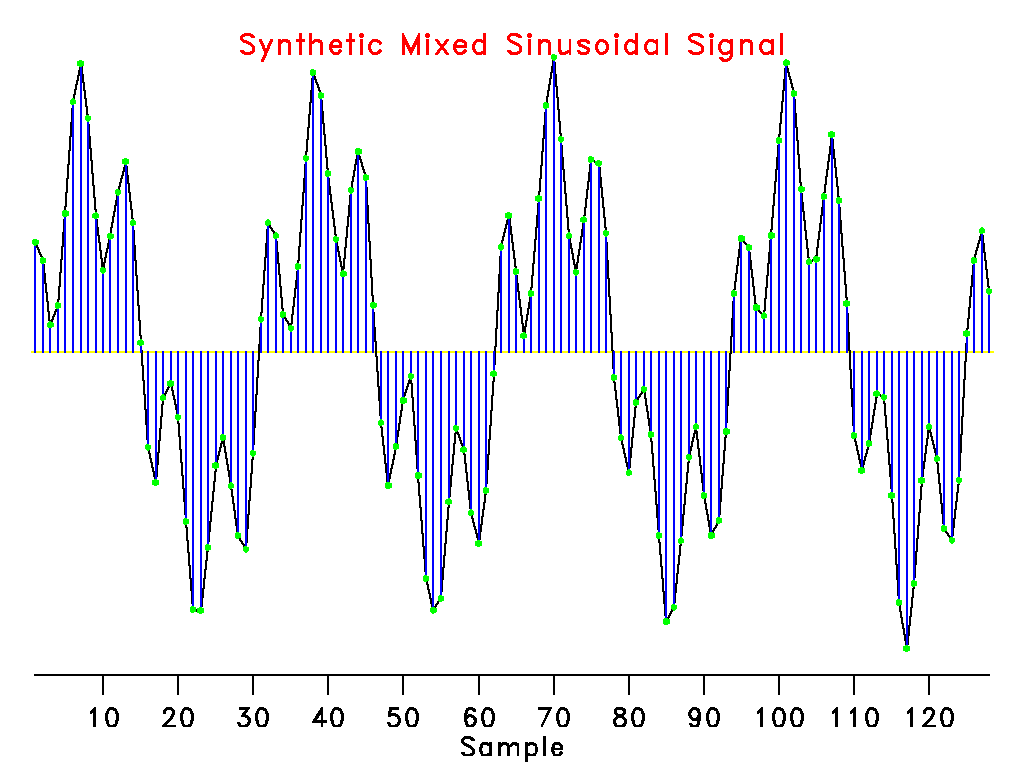

In [35]:
view('tatrace')

In [36]:
%%file taft.scons

# Find frequencies from the data

nf = 2
Flow('troots', 'tatrace', 'cpef nf=%d | roots niter=20' % (nf+1))
Result('troots', 'graph symbol=x title=Roots')

# Apply 1-D seislet transform
Flow('taft', 'tatrace troots',
     '''
     freqlet freq=${SOURCES[1]} type=b ncycle=50 perc=95
     ''')

Result('taft',
       '''
       math output="abs(input)" | real |
       dots label1=Scale unit1=  title="1-D Seislet Frame" 
       labels=First:Second yreverse=y 
       ''')

Overwriting taft.scons


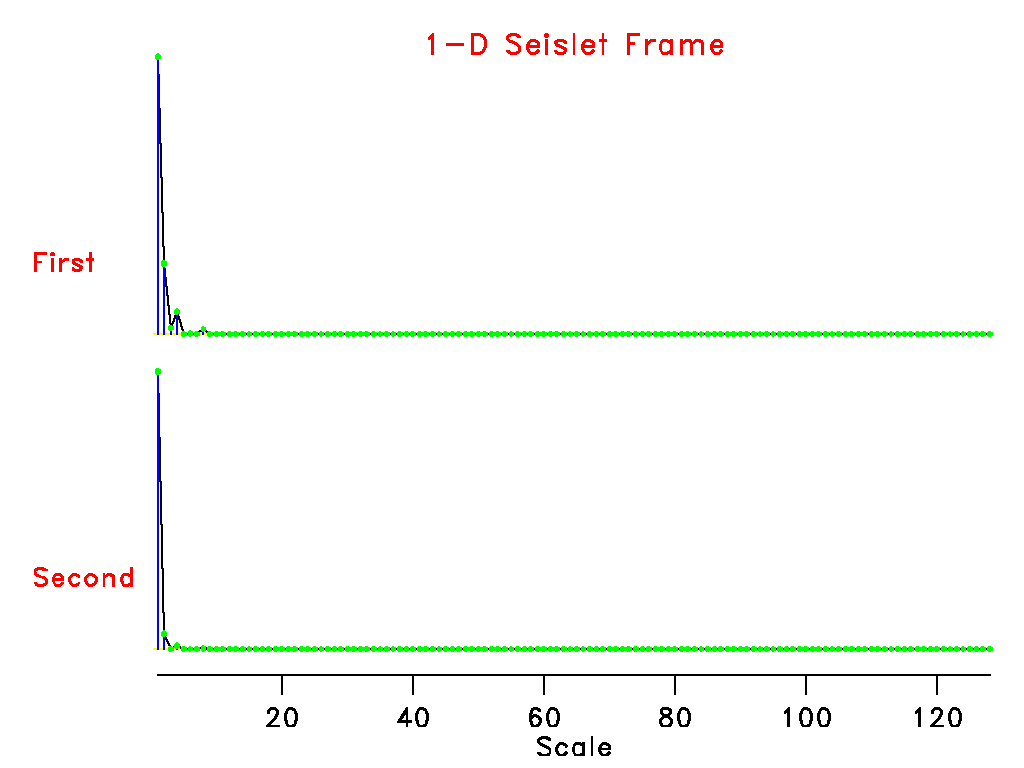

In [37]:
view('taft')

In [38]:
%%file 5_tdwt.scons

Flow('zero', 'troots', 'window n1=1 | math output=1')
Flow('tdwt', 'tatrace zero',
     '''
     freqlet freq=${SOURCES[1]} type=b  
     ''')
Result('tdwt',
       '''
       math output="abs(input)" | real |
       dots label1=Scale unit1=  title="1-D Wavelet Transform" 
       ''')

Overwriting 5_tdwt.scons


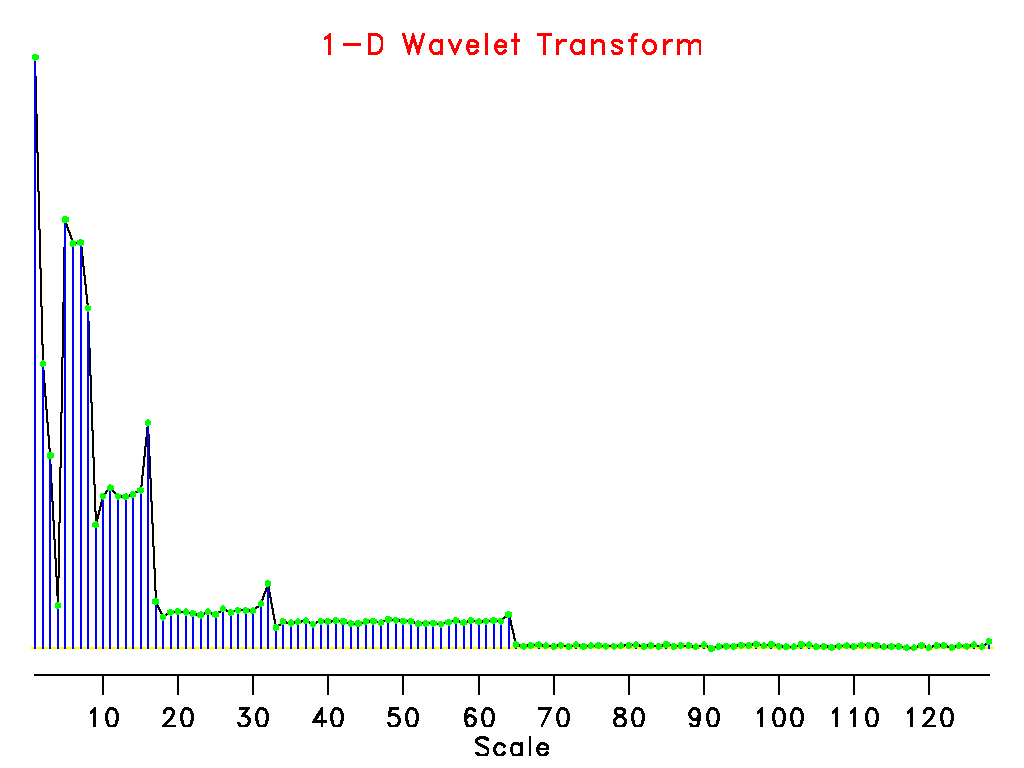

In [39]:
view('tdwt')

In [40]:
%%file fourier.scons

Flow('fourier', 'tatrace', 'fft3 axis=1')
Result('fourier',
       '''
       math output="abs(input)" | real |
       dots label1=Scale unit1=  title="1-D Fourier Transform" 
       n1=64 d1=0.5 o1=1
       ''')

Overwriting fourier.scons


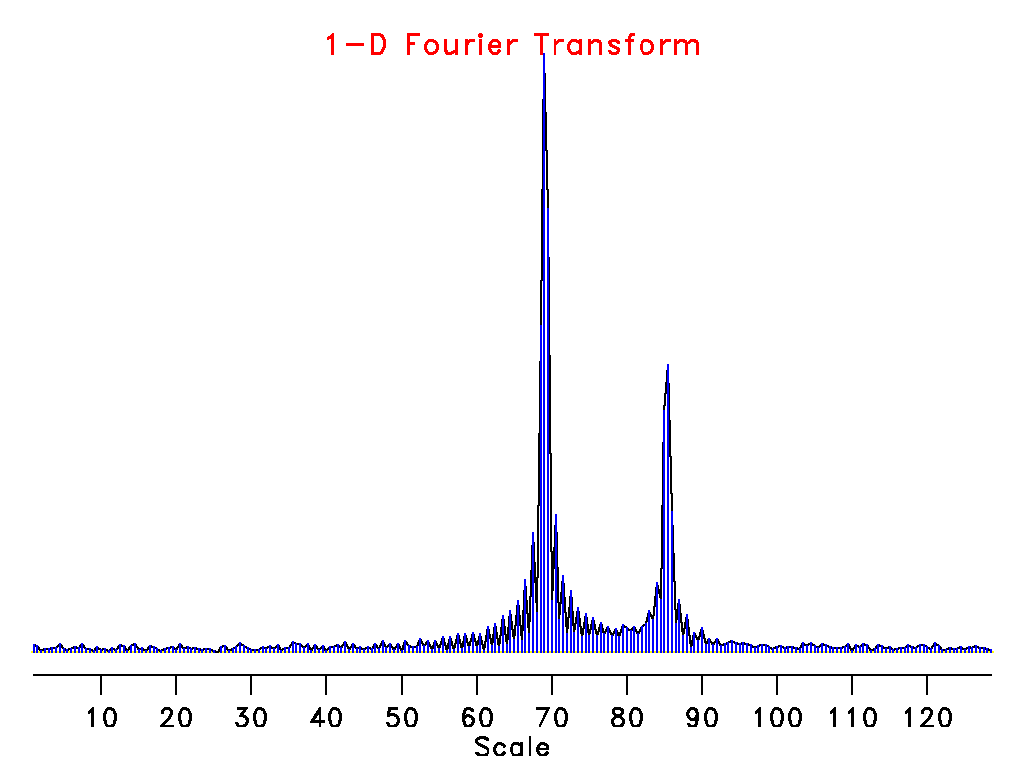

In [41]:
view('fourier')

<p id="fig:tatrace,taft,tdwt,fourier" style="color:navy">Figure 13: Mixed sinusoidal signal (a), 1-D seislet frame (b), 1-D wavelet transform (c), and 1-D Fourier transform (d).</p>

In the Fourier transform domain, the signal appears as two impulses
corresponding to the chosen frequency components. The resolution is not
perfect because of spectral leakage caused by non-periodic input data.
In the wavelet domain, the transform coefficients are not compressed
well. 

In [42]:
%%file tlog.scons

Flow('taft0', 'taft', 'window n2=1 f2=0')
Flow('taft1', 'taft', 'window n2=1 f2=1')

n1 = 128
n2 = 128*nf
p = 25.0

Flow('logtaft', 'taft0 taft1',
     '''
     cat axis=1 ${SOURCES[1]} | 
     math output="abs(input)" | 
     real | 
     scale axis=1 | 
     sort | 
     math output="%g*log(input)" |
     window n1=%d j1=%d | 
     put o1=0 d1=%g
     ''' % (10/math.log(10), n2*p/(nf*100), (nf-1), p/(n2*p/100-1)))

for case in ('tdwt', 'fourier'):
    Flow('log'+case, case,
         '''	
     math output="abs(input)" | 
     real |
     scale axis=1 | 
     sort | 
     math output="%g*log(input)" |
     window n1=%d | 
     put o1=0 d1=%g     
     ''' % (10/math.log(10), n1*p/100, p/(n1*p/100-1)))

Plot('dwt-fourier-aft', 'logtdwt logfourier logtaft',
     '''
     cat axis=2 ${SOURCES[1:3]} | 
     graph dash=1,2,0 title="Compression Ratio" 
     label1="Percentage (%)" unit1= 
     label2="a\_\s75 n \s100 (dB)" plotcol=7,7,7
     ''')  # 10 Log\_\s75 10\^\s100 (a\_\s75 n\^\s100 /a\_\s75 0\^\s100 )
box = '''
      box x0=%g y0=%g label="%s" xt=%g yt=%g
      '''
Plot('ldwt', None, box % (6.55, 4.5, "Seislet Frame", -1, -0.5))
Plot('lfourier', None, box % (6, 7.85, "Fourier Transform", -1, -0.5))
Plot('laft', None, box % (7.04, 8.1, "Wavelet Transform", 1, 0.5))
Result('tlog', 'dwt-fourier-aft ldwt laft lfourier', 'Overlay')

Overwriting tlog.scons


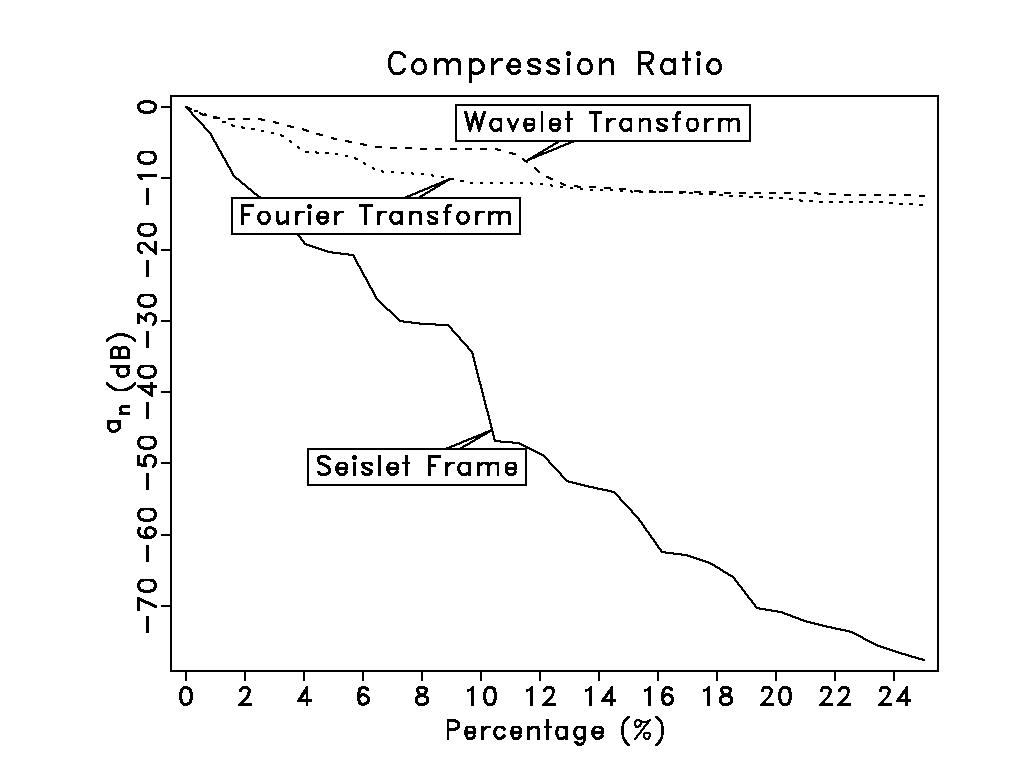

In [43]:
view('tlog')

<p id="fig:tlog" style="color:navy">Figure 14: Compression comparison between digital Fourier transform, digital wavelet transform, and 1-D seislet frame. Transform coefficients are sorted from large to small,
normalized, and plotted on a decibel scale.</p>

For further comparison, we plot the coefficients in the three
different transform domains, sorted from large to small, on a decibel
scale
(Figure <a href="#fig:tlog" data-reference-type="ref" data-reference="fig:tlog">14</a>).
The significantly faster rate of coefficient decay shows the superiority
of the 1-D seislet frame in compressing sinusoidal signals.

### 2-D data analysis with 1-D seislet frame

To analyze 2-D data, one can apply 1-D seislet frame in the distance
direction after the Fourier transform in time (the $F$-$X$ domain). In
this case, different frame frequencies correspond to different
plane-wave slopes (Canales, 1984). 

In [44]:
%%file plane.scons

Flow('plane', None,
     '''
     spike n1=512 n2=256 d2=1 o2=0 label2=Trace unit2=
     nsp=3 k1=64,160,286 p2=0.5,1,0 mag=0.5,0.5,1 |
     ricker1 frequency=20 |
     noise seed=2008 var=0
     ''')
Result('plane',
       '''
       window j2=4 |
       wiggle 
       transp=y yreverse=y poly=y clip=0.15
       title=Input wheretitle=b wherexlabel=t
       ''')

Overwriting plane.scons


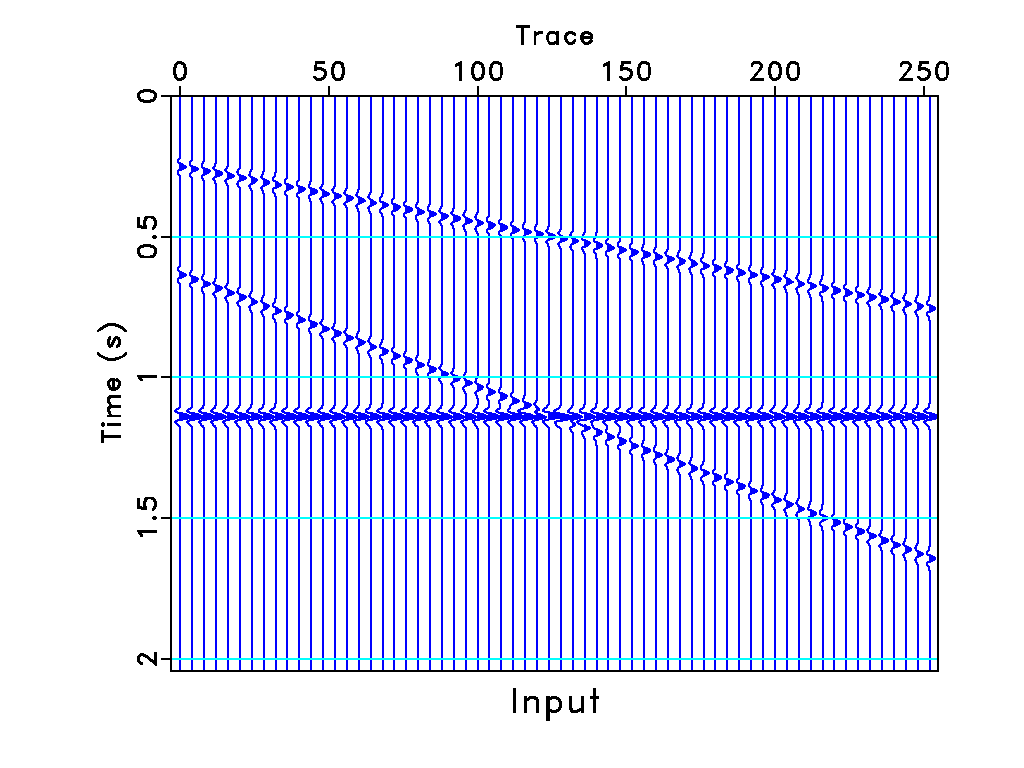

In [45]:
view('plane')

In [46]:
%%file fft.scons

# Fourier transform in time
Flow('fft', 'plane', 'fft1')
Result('fft', 'real | window max1=60 | grey title="Frequency domain"')

Overwriting fft.scons


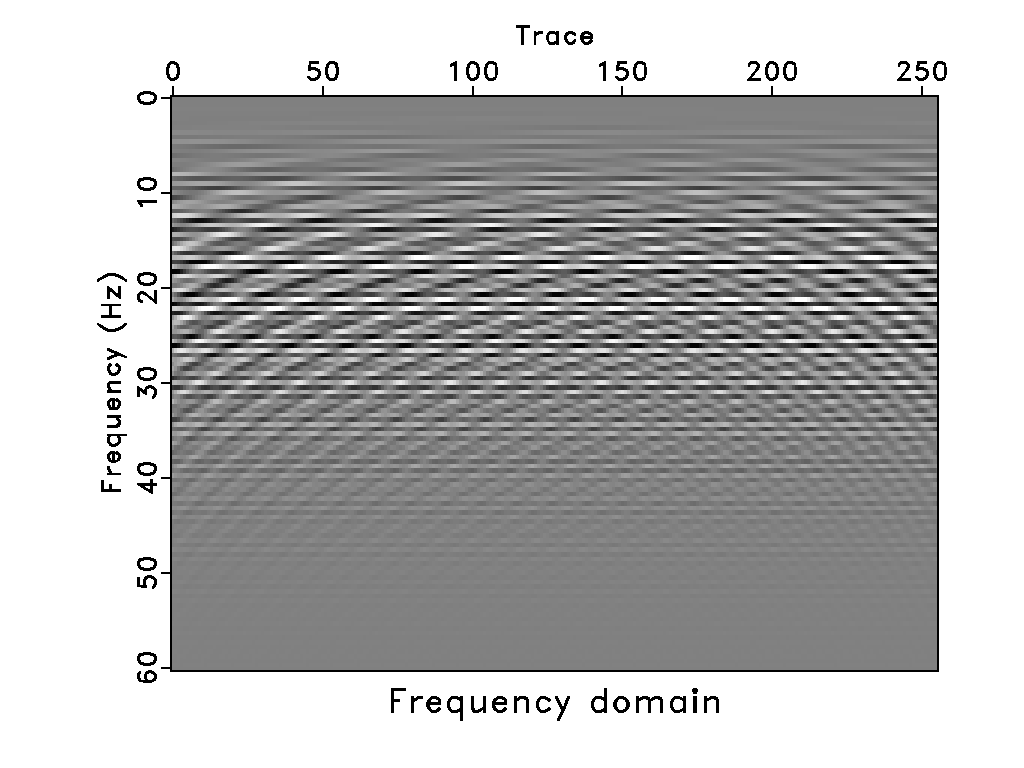

In [47]:
view('fft')

<p id="fig:plane,fft" style="color:navy">Figure 15: Synthetic plane-wave data (a) and corresponding Fourier transform along the time direction (b).</p>

We use a simple plane-wave synthetic model to verify
this observation
(Figure <a href="#fig:plane" data-reference-type="ref" data-reference="fig:plane">15a</a>).
The $F$-$X$ plane is shown in
Figure <a href="#fig:fft" data-reference-type="ref" data-reference="fig:fft">15b</a>.

In [48]:
%%file iplane.scons

Flow('fslice','fft','transp')

# Estimate plane wave slopes

Flow('z','fslice','cpef nf=5 | roots niter=100')

# 1-D seislet transform

inverse = '''
freqlet freq=${SOURCES[1]} type=bio ncycle=100 perc=99
'''

Flow('freq','fslice z',inverse + ' verb=n')

# Slope decomposition

for p in range(4):
    z = 'z%d' % p
    plane = 'plane%d' % p
    freq = 'pfreq%d' % p

    Flow(z, 'z', 'window n1=1 f1=%d squeeze=n' % p)
    Plot(freq, 'freq',
         '''
         window n2=1 f2=%d | transp |
         math output="abs(input)" |
         real | window max1=60 n2=25 |
         wiggle transp=y yreverse=y  wheretitle=b wherexlabel=t 
         title="Component %d" poly=y  clip=1300
         label2=Scale unit2=
         ''' % (p, p))

    Flow(plane, ['freq', z],
         '''
         window n2=1 f2=%d squeeze=n |
         freqlet freq=${SOURCES[1]} 
         inv=y type=bio |
         transp |
         fft1 inv=y
         ''' % p)

    Plot(plane,
         '''
           window j2=4 |
           wiggle 
           transp=y yreverse=y poly=y clip=0.15
           unit2= wheretitle=b wherexlabel=t
           title="Plane %d" 
           ''' % p)

    Result(plane, [freq, plane], 'SideBySideIso')

Overwriting iplane.scons


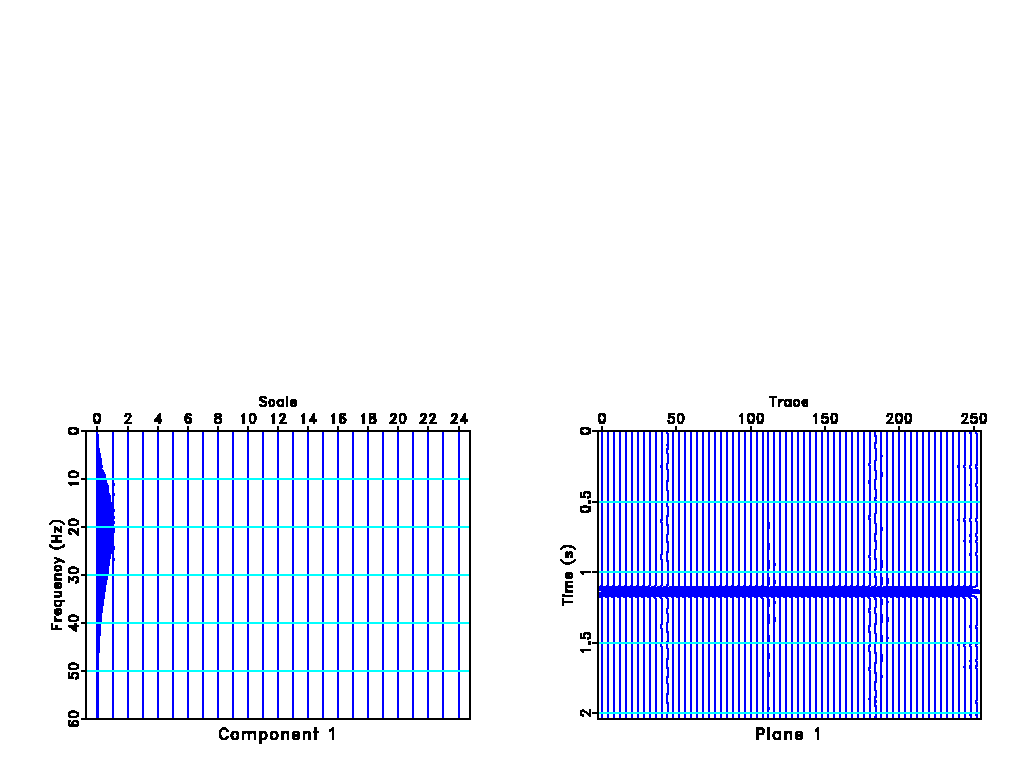

In [49]:
view('plane1')

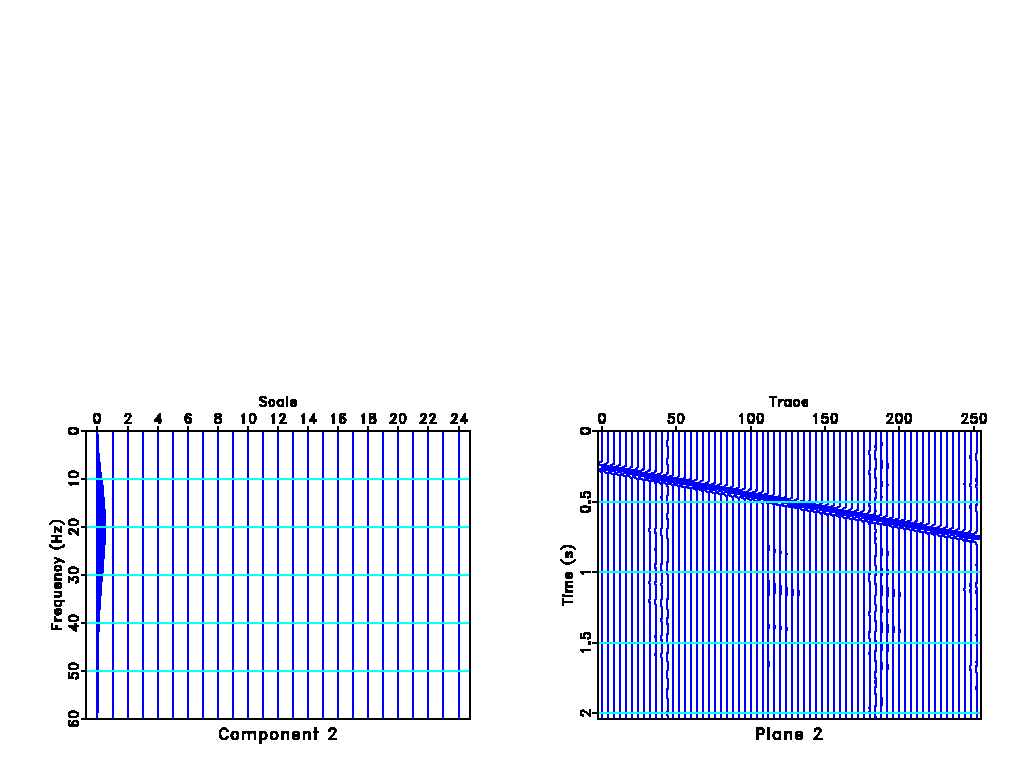

In [50]:
view('plane2')

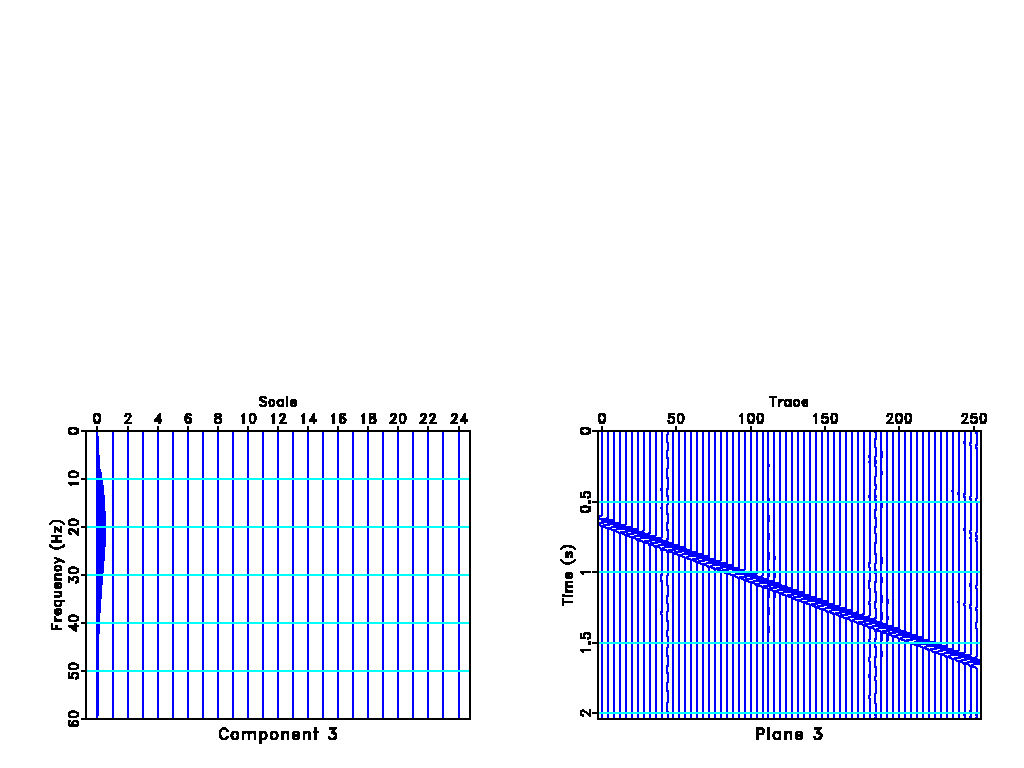

In [51]:
view('plane3')

<p id="fig:plane1,plane2,plane3" style="color:navy">Figure 16: Seislet coefficients (left) and corresponding recovered plane-wave components (right) for three different parts of the 1-D seislet frame in the F-X domain.</p>

We find a prediction-error-filter (PEF) in each frequency slice and
detect its roots to select appropriate spatial frequencies. We use
Burg’s algorithm for PEF estimation (Burg, 1975; Claerbout, 1976) and an eigenvalue-based algorithm
for root finding (Edelman and Murakami, 1995). The seislet coefficients and the corresponding
recovered plane-wave components are shown in
Figure <a href="#fig:plane1,plane2,plane3" data-reference-type="ref" data-reference="fig:plane1,plane2,plane3">16</a>.
Similarly to the 1-D example, information from different plane-waves
gets compressed in the transform domain.

### 2-D data analysis with 2-D seislet frame

To show an example of 2-D data analysis with 2-D seislet frames, we use
the CMP gather from Figure
 <a href="#fig:gath" data-reference-type="ref" data-reference="fig:gath">7a</a>.
We try two different choices for selecting a set of dip fields for the
frame construction.

In [52]:
%%file cdips.scons

from rsf.recipes.beg import server as private

def grey(title,other=''):
    return '''
    grey title="%s" 
    label1="Time (s)" label2="Offset (m)" %s 
    ''' % (title,other)

#########################
# Real data
#########################
Fetch('elf0.H', 'elf', private)
Flow('cmp', 'elf0.H',
     '''
     dd form=native | cut n3=1 n2=1 n1=300 f3=663 f2=67 |
     bandpass flo=5 fhi=60 | window n2=128 n3=1 f3=500 |
     put d2=0.0125 o2=0.05
     ''')

Flow('part', 'cmp', 'window n2=128 n3=1 f3=500')
Result('part', grey('Input', 'label2="Half offset" unit2=km'))

#########################
# Linear Radon
#########################
p0 = -1
dp = 0.06
np = 50
cdips = []
for ip in range(np):
    cdip = 'cdip%d' % ip
    p = p0 + ip*dp
    Flow(cdip, 'part', 'math output="%g" | clip clip=3 ' % (p))
    cdips.append(cdip)
Flow('cdips', cdips,
     'cat axis=3 ${SOURCES[1:%d]} | put o3=-1 d3=0.06 label3=Dip unit3=' % np)
Result('cdips',
       '''
       transp plane=23 |
       byte allpos=n gainpanel=a scalebar=y bar=bar2.rsf |
       grey3 color=j frame1=400 frame3=64 frame2=25
       label1=Time unit1=s label3="Half offset" unit3=km point1=0.85 point2=0.7
       title="Constant dip field" flat=n scalebar=y bar=bar2.rsf
       ''')

Overwriting cdips.scons


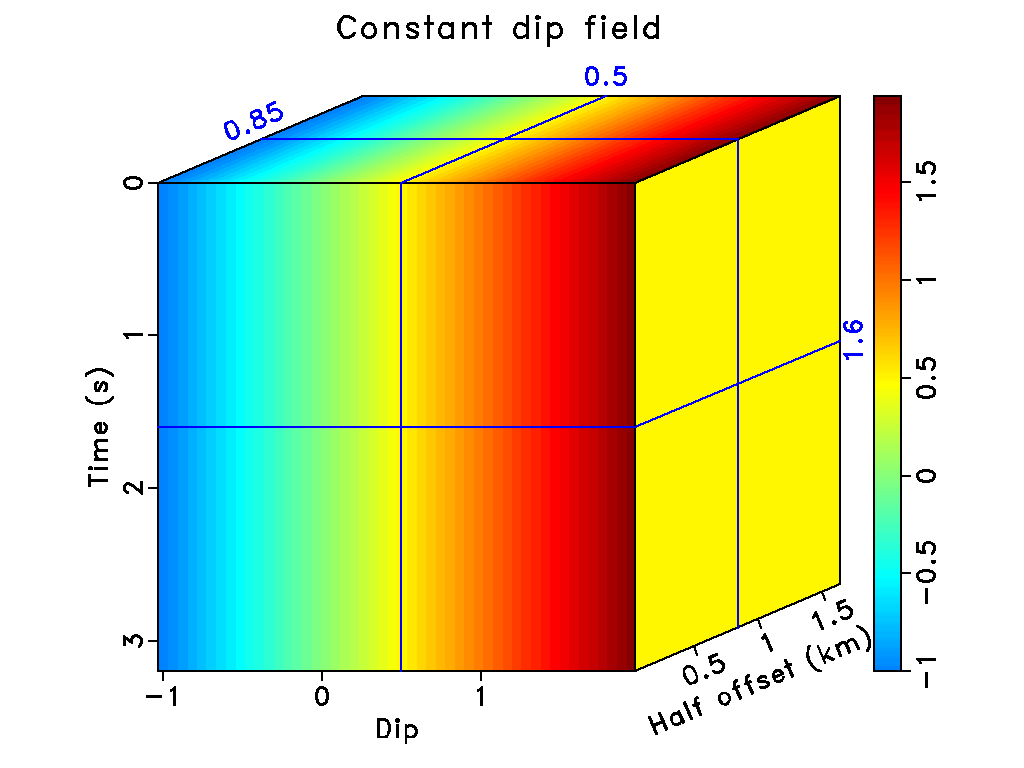

In [53]:
view('cdips')

In [54]:
%%file rrdips.scons

def grey(title,other=''):
    return '''
    grey title="%s" 
    label1="Time (s)" label2="Offset (m)" %s 
    ''' % (title,other)

# Velocity scan
Flow('vpart', 'part', 'vscan semblance=n v0=1. nv=50 dv=0.08 half=y')
Plot('vpart',
     grey('Velocity Scan (Data)', 'label2="Velocity (km/s)" \
     color=j allpos=y screenratio=1.5'))

#########################
# Hyperbolic Radon
#########################
# Test diplet
v0 = 1.
dv = 0.06
nv = 50
n1 = 800
n2 = 128          # data dimensions
d2 = 0.0125
o2 = 0.05
n3 = 50
d1 = 0.004
rrdips = []

for iv in range(nv):
    rrdip = 'rrdip%d' % iv
    v = v0 + iv*dv
    Flow(rrdip, 'part',
         'math output="%g*x2/(%g*x1+0.0001)" | clip clip=3' % ((4*d2/d1), (v*v)))
    rrdips.append(rrdip)
Flow('rrdips', rrdips,
     '''
     cat axis=3 ${SOURCES[1:%d]} |
     put o3=1.0 d3=0.06 label3=Velocity unit3=km/s
     ''' % nv)
Result('rrdips',
       '''
       transp plane=23 | byte allpos=n gainpanel=a scalebar=y bar=bar.rsf |
       grey3 color=j frame1=400 frame3=64 frame2=25
       label1=Time unit1=s label3="Half offset" unit3=km point1=0.85 point2=0.7
       title="Variable dip field" flat=n scalebar=y bar=bar.rsf
       ''')

Overwriting rrdips.scons


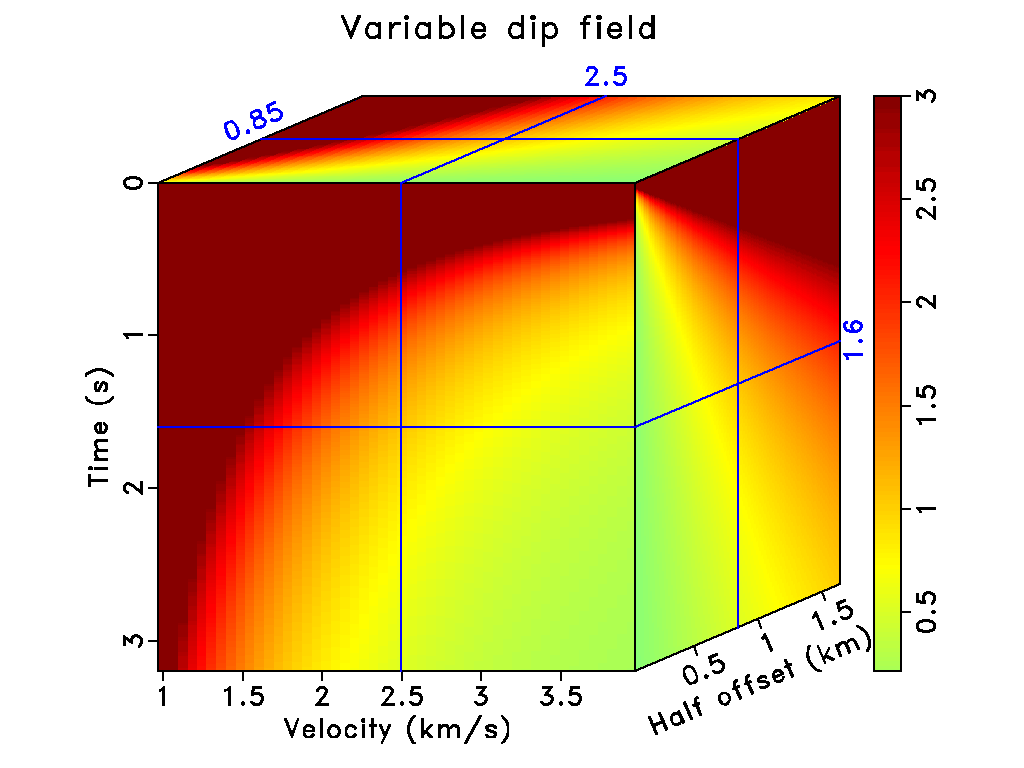

In [55]:
view('rrdips')

<p id="fig:cdips,rrdips" style="color:navy">Figure 17: Constant dip field (a) and time- and space-varying dip field (b).</p>

In [56]:
%%file cdiplet.scons

Flow('cdiplet', 'part cdips',
     'diplet dips=${SOURCES[1]} type=b niter=10 ncycle=5 perc=99')
Result('cdiplet',
       '''
       put o3=-1.0 d3=0.06 d2=1 o2=0 label2=Scale unit2=
       label3=Dip unit3= label1=Time unit1=s |
       transp plane=23 | byte allpos=y gainpanel=a scalebar=y bar=bar3.rsf |
       grey3 color=i frame1=400 frame3=0 frame2=25 point1=0.85 point2=0.7
       title="Frame coefficients" flat=n scalebar=n 
       ''')

Overwriting cdiplet.scons


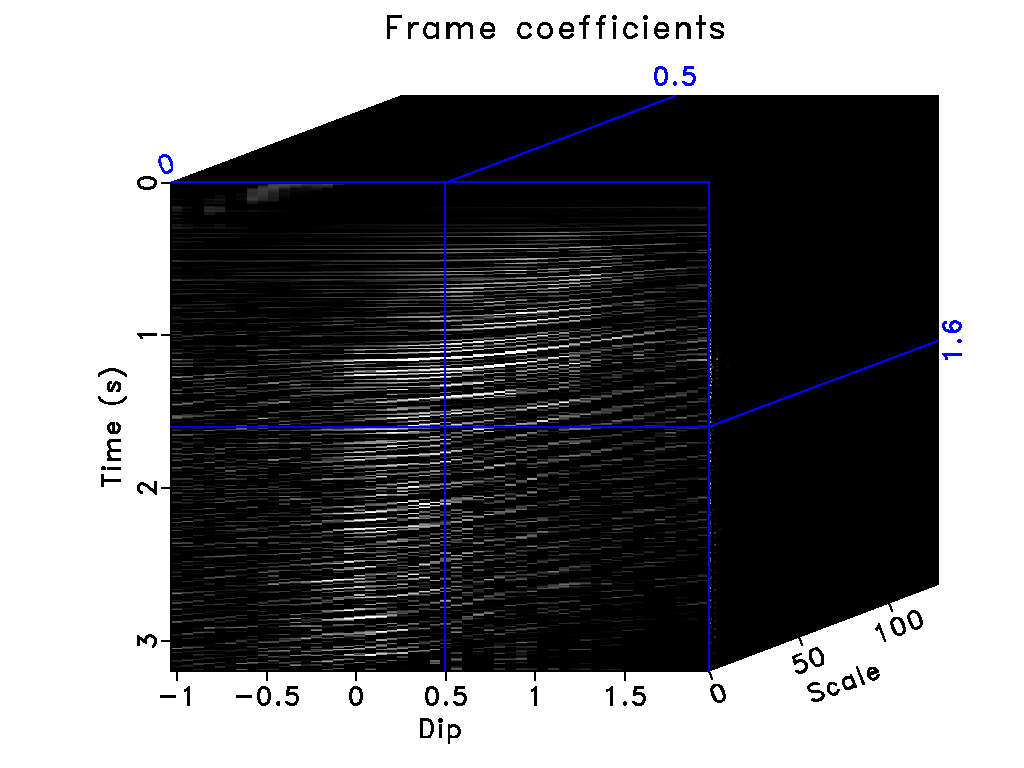

In [57]:
view('cdiplet')

In [58]:
%%file rrdiplet.scons

Flow('rrdiplet', 'part rrdips',
     'diplet dips=${SOURCES[1]} type=b niter=10 ncycle=5 perc=99')
Result('rrdiplet',
       '''
       put o3=1.0 d3=0.06 d2=1 o2=0 label2=Scale unit2=
       label3=Velocity unit3=km/s label1=Time unit1=s |
       transp plane=23 | byte allpos=y gainpanel=a scalebar=y bar=bar1.rsf |
       grey3 color=i frame1=400 frame3=0 frame2=25 point1=0.85 point2=0.7
       title="Frame coefficients" flat=n scalebar=n 
       ''')

Overwriting rrdiplet.scons


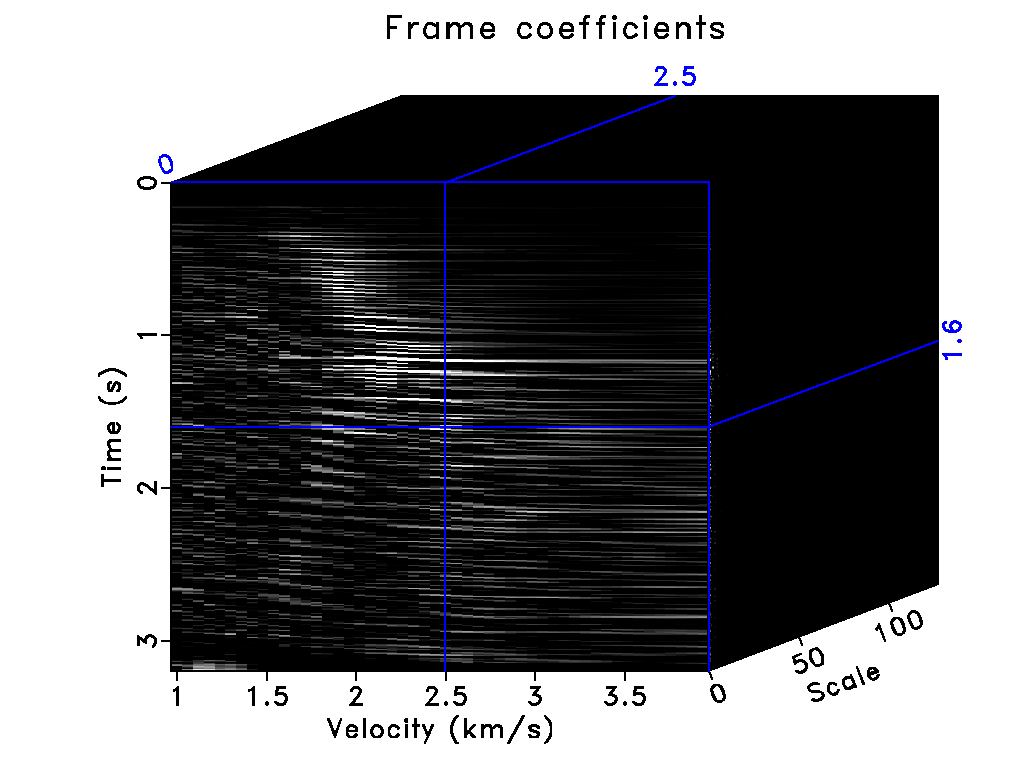

In [59]:
view('rrdiplet')

<p id="fig:cdiplet,rrdiplet" style="color:navy">Figure 18: 2-D seislet frame coefficients with constant dip field (a) and with varying dip field (b).</p>

In [66]:
%%file cdipimps.scons

Flow('cinv', 'cdiplet cdips', 'diplet dips=${SOURCES[1]} type=b inv=y ')

import random

def rnd(x):
    global nr
    r = str(random.randint(1,nr))
    return r

nsp = 200         # number of spikes
nr = 800
eps = 0.1         # regularization
k1 = ','.join([rnd(x) for x in range(nsp)])
nr = 128
k2 = ','.join([rnd(x) for x in range(nsp)])
nr = 50
k3 = ','.join([rnd(x) for x in range(nsp)])

n1=800
n2=128          # data dimensions
d2=0.0125
o2=0.05
n3=50
d1=0.004

Flow('cdipimps', 'cdiplet cdips',
     '''
     spike nsp=%d k1=%s k2=%s k3=%s
     n1=%d n2=%d n3=%d o2=%g d2=%g label2="Half offset" |
     diplet inv=y eps=%g dips=${SOURCES[1]} 
     ''' % (nsp, k1, k2, k3, n1, n2, n3, o2, n2, eps), stdin=0)
Result('cdipimps',
       '''
       put d2=0.0125 o2=0.05 |
       grey unit1=s title="Constant dip field"
       label2="Half offset" unit2=km
       ''')

Overwriting cdipimps.scons


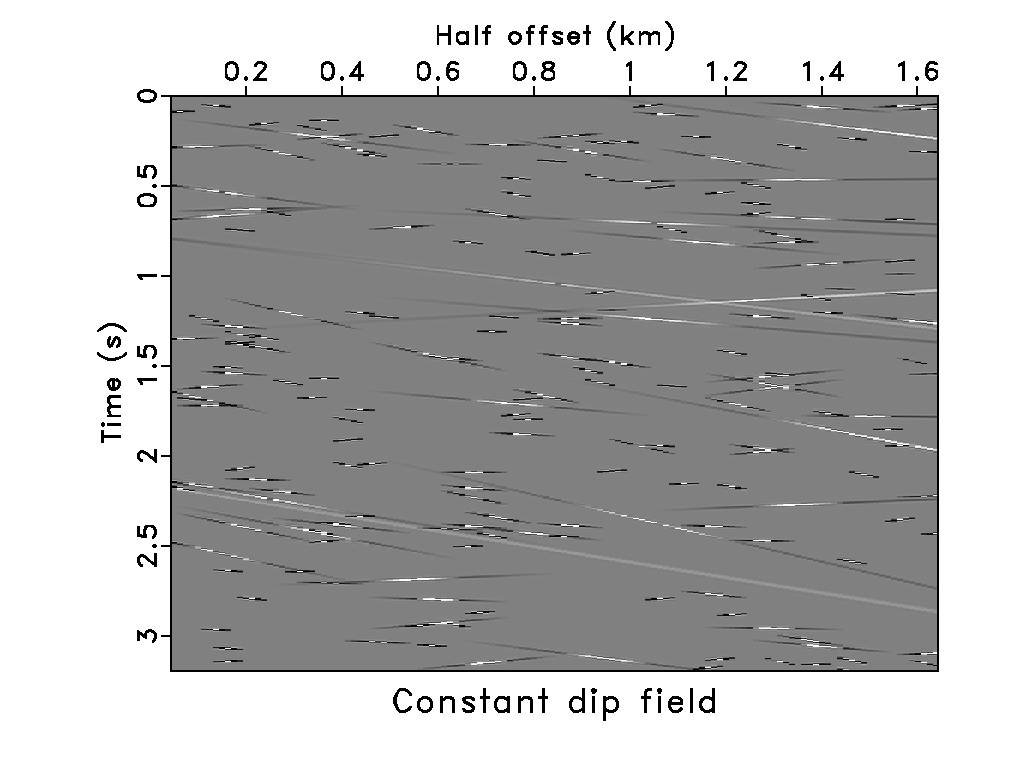

In [67]:
view('cdipimps')

In [69]:
%%file rrdipimps.scons

Flow('inver', 'rrdiplet rrdips', 'diplet dips=${SOURCES[1]} type=b inv=y')
Plot('inver', grey('Inversion'))
Plot('comp2', 'part inver', 'SideBySideAniso')

nsp = 200         # number of spikes
nr = 800
eps = 0.1         # regularization
k1 = ','.join([rnd(x) for x in range(nsp)])
nr = 128
k2 = ','.join([rnd(x) for x in range(nsp)])
nr = 50
k3 = ','.join([rnd(x) for x in range(nsp)])

Flow('rrdipimps', 'rrdiplet rrdips',
     '''
     spike nsp=%d k1=%s k2=%s k3=%s
     n1=%d n2=%d n3=%d o2=%g d2=%g label2="Half offset" |
     diplet inv=y eps=%g dips=${SOURCES[1]} 
     ''' % (nsp, k1, k2, k3, n1, n2, n3, o2, n2, eps), stdin=0)
Result('rrdipimps',
       '''
       put d2=0.0125 o2=0.05 |
       grey unit1=s title="Variable dip field"
       label2="Half offset" unit2=km
       ''')

Overwriting rrdipimps.scons


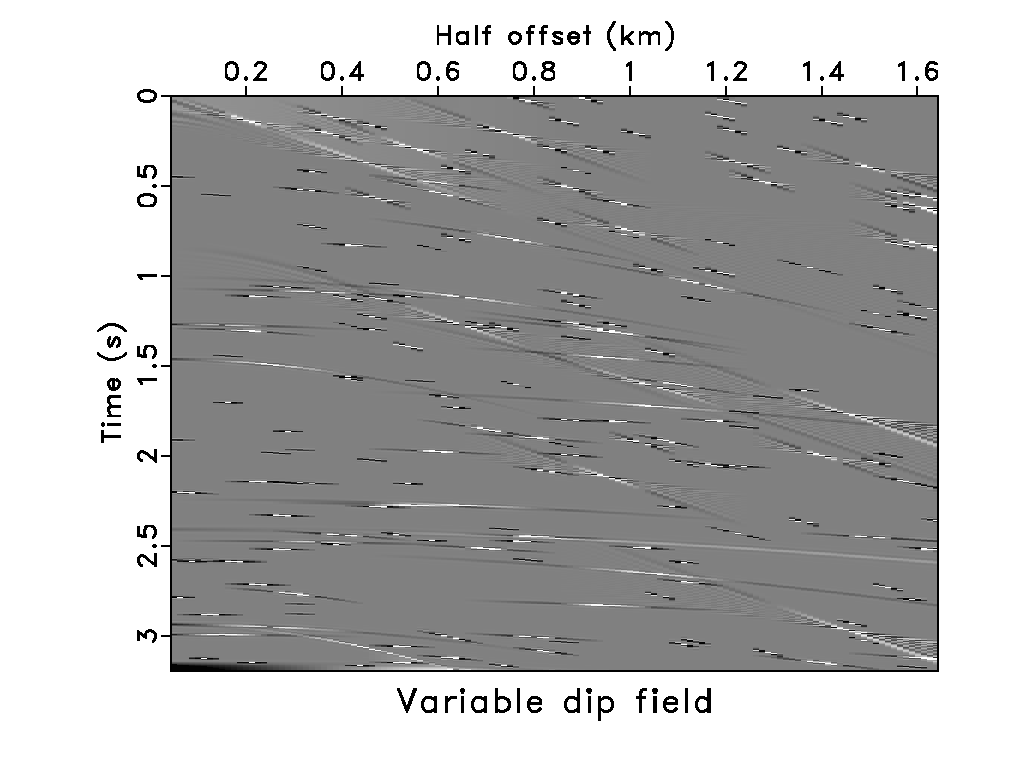

In [70]:
view('rrdipimps')

<p id="fig:cdipimps,rrdipimps" style="color:navy">Figure 19: Randomly selected representative frame functions for 2-D seislet frame with constant dip  eld (a) and varying dip  eld (b).</p>

First, we define dip fields by scanning different constant dips
(Figure <a href="#fig:cdips" data-reference-type="ref" data-reference="fig:cdips">17a</a>).
In this case, the zero-scale coefficients out of the 2-D seislet frame
correspond to the slant-stack (Radon transform) gather
(Figure <a href="#fig:cdiplet" data-reference-type="ref" data-reference="fig:cdiplet">18a</a>).
Figure <a href="#fig:cdipimps" data-reference-type="ref" data-reference="fig:cdipimps">19a</a>
shows randomly selected example frame functions for the 2-D seislet
frame using constant dips

Our second choice is a set of dip fields defined by the hyperbolic shape
of seismic events on the CMP gather:
\begin{equation}
t(x)=\sqrt{t^2_0+\frac{x^2}{v^2}}\;,
\label{eq:hyper}
\end{equation}
where $t(x)$ is traveltime for reflection at offset
$x$, $t_0$ is the zero-offset traveltime, and $v$ is the
root-mean-square velocity. For a range of constant velocities, the
direct relationship between dip and velocity is given by
\begin{equation}
p =\frac{dt}{dx}=\frac{x}{v^2 t}\;.
\label{eq:hyperdip}
\end{equation}
The dip field $p(x,t,v)$ is shown in
Figure <a href="#fig:rrdips" data-reference-type="ref" data-reference="fig:rrdips">17b</a>.
Analogously to the case of constant dips, the frame coefficients at the
zero scale correspond to the hyperbolic Radon transform (Thorson and Claerbout, 1985), with the
primary and multiple reflections distributed in different velocity
ranges
(Figure <a href="#fig:rrdiplet" data-reference-type="ref" data-reference="fig:rrdiplet">18b</a>).
Figure <a href="#fig:rrdipimps" data-reference-type="ref" data-reference="fig:rrdipimps">19b</a>
shows randomly selected frame functions for the 2-D seislet frame with
varying dip fields defined by a range of constant velocities.

## Discussion

|      Data size     | 1-D FFT | 1-D DWT | 1-D seislet | 2-D seislet |
|:------------------:|:-------:|:-------:|:-----------:|:-----------:|
| $1024 \times 1024$ |   0.06  |   0.03  |     0.17    |     1.03    |
|  $512 \times 512$  |   0.02  |   0.01  |     0.04    |     0.22    |

How efficient are the proposed algorithms? that, while the seislet
transform and frame can be more expensive than FFT or DWT, they are
still comfortably efficient in practice. In applications of the 2-D
seislet transform, the main cost may not be in the transform itself but
in iterative estimation of the slope fields. In practical large-scale
applications, it is advantageous to break the input data in parts and
process them in parallel.

How effective are the seislet transform and frame in compressing seismic
data? , it appears that one would need to store this field in addition
to the compressed data. However, since we force the estimated slopes to
be smooth, the slope field can be easily compressed with one of the
classic compression algorithms. Consider the example in
Figure <a href="#fig:sigmoid,sigmoiddip" data-reference-type="ref" data-reference="fig:sigmoid,sigmoiddip">2</a>.
Suppose that we apply lossy compression and require 99% of the energy to
be preserved. The seislet transform compression ratio in this case is
less that 1% while the corresponding wavelet transform ratio is 26%.
Applied to the smooth slope field from
Figure <a href="#fig:sigmoiddip" data-reference-type="ref" data-reference="fig:sigmoiddip">2b</a>,
the wavelet transform compresses it to about 0.1%. This example shows
that compressing seismic data with the seislet transform and the
corresponding slope field with the wavelet transform can be
significantly more effective that trying to compress seismic data with
the wavelet transform.

## Conclusions

We have introduced a new digital transform named *seislet transform*
because of its ability to characterize and compress seismic data in the
manner similar to that of digital wavelet transforms. We define the
seislet transform by combining the wavelet lifting scheme with local
plane-wave destruction. In 1-D, the seislet transform follows sinusoidal
components. In 2-D, it follows locally plane events. When more than one
sinusoid or more than one local slope are for the analysis, the
transform turns into an overcomplete representation or a frame. The
seislet transform and seislet frame can achieve a better compression
ratio than either the digital Fourier transform (DFT) or the digital
wavelet transform (DWT).

The seislet transform provides a convenient orthogonal basis with the
basis functions spanning different scales analogously to those of the
digital wavelet transform but aligned along the dominant seismic events.
Traditional signal analysis operations such as denoising and trace
interpolation become simply defined in the seislet domain and allow for
efficient algorithms. Seismic stacking also has a simple meaning of the
zeroth-order seislet coefficient computed in an optimally efficient
manner by recursive partial stacking and thus avoiding the usual
problems with wavelet stretch and nonhyperbolic moveouts.

## Acknowledgments

We thank BGP Americas for a partial financial support of this work. The
first author is grateful to Huub Douma for inspiring discussions and for
suggesting the name “seislet”. This publication is authorized by the
Director, Bureau of Economic Geology, The University of Texas at Austin.

## Appendix: Review of Plane-Wave Destruction

This appendix reviews the basic theory of plane-wave destruction .

Following the physical model of local plane waves, we define the
mathematical basis of plane-wave destruction filters via the local plane
differential equation 
\begin{equation}
{\frac{\partial P}{\partial x}} +
  {\sigma\,\frac{\partial P}{\partial t}} = 0\;,
  \label{eqn:pde}
\end{equation}  
where $P(t,x)$ is the wave field, and $\sigma$ is
the local slope, which may also depend on $t$ and $x$. In the case of a
constant slope,
equation <a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">18</a>
has the simple general solution 
\begin{equation}
\label{eqn:plane}
  P(t,x) = f(t - \sigma x)\;,
\end{equation} 
where $f(t)$ is an arbitrary waveform.
Equation <a href="#eqn:plane" data-reference-type="ref" data-reference="eqn:plane">19</a>
is nothing more than a mathematical description of a plane wave.

If we assume that the slope $\sigma$ does not depend on $t$, we can
transform
equation <a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">18</a>
to the frequency domain, where it takes the form of the ordinary
differential equation 
\begin{equation}
{\frac{d \hat{P}}{d x}} +
  i \omega\,\sigma\, \hat{P} = 0
  \label{eqn:ode}
\end{equation}  
and has the general solution 
\begin{equation}
\label{eqn:px}
  \hat{P} (x) = \hat{P} (0)\,e^{i \omega\,\sigma x}\;,
\end{equation}   
where $\hat{P}$
is the Fourier transform of $P$. The complex exponential term in
equation <a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">21</a>
simply represents a shift of a $t$-trace according to the slope $\sigma$
and the trace separation $x$.

In the frequency domain, the operator for transforming the trace $x-1$
to the neighboring trace $x$ is a multiplication by $e^{i
  \omega\,\sigma}$. In other words, a plane wave can be perfectly
predicted by a two-term prediction-error filter in the $F$-$X$ domain:
\begin{equation}
\label{eqn:pef}
  a_0 \, \hat{P} (x) + a_1\, \hat{P} (x-1) = 0\;,
\end{equation}   
where $a_0 = 1$ and
$a_1 = - e^{i \omega\,\sigma}$. The goal of predicting several plane
waves can be accomplished by cascading several two-term filters. In
fact, any $F$-$X$ prediction-error filter represented in the
$Z$-transform notation as 
\begin{equation}
\label{eqn:pef2}
  A(Z_x) = 1 + a_1 Z_x + a_2 Z_x^2 + \cdots + a_N Z_x^N
\end{equation}   
can be
factored into a product of two-term filters: 
\begin{equation}
\label{eqn:pef3}
  A(Z_x) = \left(1 - \frac{Z_x}{Z_1}\right)\left(1 - \frac{Z_x}{Z_2}\right)
  \cdots\left(1 - \frac{Z_x}{Z_N}\right)\;,
\end{equation}   
where $Z_1,Z_2,\ldots,Z_N$
are the zeroes of
polynomial <a href="#eqn:pef2" data-reference-type="ref" data-reference="eqn:pef2">22</a>.
According to
equation <a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">18</a>,
the phase of each zero corresponds to the slope of a local plane wave
multiplied by the frequency. Zeroes that are not on the unit circle
carry an additional amplitude gain not included in
equation <a href="#eqn:ode" data-reference-type="ref" data-reference="eqn:ode">20</a>.

In order to incorporate time-varying slopes, we need to return to the
time domain and look for an appropriate analog of the phase-shift
operator <a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">21</a>
and the plane-prediction
filter <a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">23</a>.
An important property of plane-wave propagation across different traces
is that the total energy of the propagating wave stays invariant
throughout the process: the energy of the wave at one trace is
completely transmitted to the next trace. This property is assured in
the frequency-domain
solution <a href="#eqn:px" data-reference-type="ref" data-reference="eqn:px">21</a>
by the fact that the spectrum of the complex exponential
$e^{i \omega\,\sigma}$ is equal to one. In the time domain, we can reach
an equivalent effect by using an all-pass digital filter. In the
$Z$-transform notation, convolution with an all-pass filter takes the
form 
\begin{equation}
\label{eqn:allpass}
\hat{P}_{x+1}(Z_t) = \hat{P}_{x} (Z_t) \frac{B(Z_t)}{B(1/Z_t)}\;,
\end{equation}  
where $\hat{P}_x (Z_t)$ denotes the $Z$-transform of the corresponding
trace, and the ratio $B(Z_t)/B(1/Z_t)$ is an all-pass digital filter
approximating the time-shift operator $e^{i \omega \sigma}$. In
finite-difference terms,
equation <a href="#eqn:allpass" data-reference-type="ref" data-reference="eqn:allpass">25</a>
represents an implicit finite-difference scheme for solving
equation <a href="#eqn:pde" data-reference-type="ref" data-reference="eqn:pde">18</a>
with the initial conditions at a constant $x$. The coefficients of
filter $B(Z_t)$ can be determined, for example, by fitting the filter
frequency response at low frequencies to the response of the phase-shift
operator. This leads to a version of Thiran’s maximally-flat all-pass
fractional-delay filters .

Taking both dimensions into consideration,
equation <a href="#eqn:allpass" data-reference-type="ref" data-reference="eqn:allpass">25</a>
transforms to the prediction equation analogous
to <a href="#eqn:pef" data-reference-type="ref" data-reference="eqn:pef">23</a>
with the 2-D prediction filter 
\begin{equation}
\label{eqn:2dpef}
  A(Z_t,Z_x) = 1 - Z_x \frac{B(Z_t)}{B(1/Z_t)}\;.
\end{equation}    
In order to
characterize several plane waves, we can cascade several filters of the
form <a href="#eqn:2dpef" data-reference-type="ref" data-reference="eqn:2dpef">26</a>
in a manner similar to that of
equation <a href="#eqn:pef3" data-reference-type="ref" data-reference="eqn:pef3">24</a>.
A modified version of the filter $A(Z_t,Z_x)$, namely the filter
\begin{equation}
\label{eqn:2dpef2}
  C(Z_t,Z_x) = A(Z_t,Z_x) B(1/Z_t) = B(1/Z_t) - Z_x B(Z_t)\;,
\end{equation}    
avoids
the need for polynomial division. In case of 3-point filter $B(Z_t)$,
the 2-D
filter <a href="#eqn:2dpef2" data-reference-type="ref" data-reference="eqn:2dpef2">27</a>
has exactly six coefficients. It consists of two columns, each column
having three coefficients and the second column being a reversed copy of
the first one.

## References

Abma, R., and N. Kabir, 2006, 3D interpolation of irregular data with a
POCS algorithm: Geophysics, **71**, E91–E97.

Burg, J. P., 1975, Maximum entropy spectral analysis: PhD thesis,
Stanford University.

Canales, L. L., 1984, Random noise reduction: 54th Annual International
Meeting, SEG, Expanded Abstracts, Session: S10.1.

Candés, E. J., and L. Demanet, 2005, The curvelet representation of wave
propagators is optimally sparse: Communications on Pure and Applied
Mathematics, **58**, 1472–1528.

Chauris, H., and T. Nguyen, 2008, Seismic demigration/migration in the
curvelet domain: Geophysics, S35–S46.

Claerbout, J. F., 1976, Fundamentals of geophysical data processing:
Blackwell Scientific Publications.

——–, 1992, Earth Soundings Analysis: Processing Versus Inversion:
Blackwell Scientific Publications.

——–, 2008, Basic Earth imaging: Stanford Exploration Project,
`http://sepwww.stanford.edu/sep/prof/`.

Cohen, A., I. Daubechies, and J. Feauveau, 1992, Biorthogonal bases of
compactly supported wavelets: Communications on Pure and Applied
Mathematics, **45**, 485–560.

Daubechies, I., M. Defrise, and C. D. Mol, 2004, An iterative
thresholding algorithm for linear inverse problems with a sparsity
constraint: Communications on Pure and Applied Mathematics, **LVII**,
1413–1457.

Dessing, F. J., 1997, A wavelet transform approach to seismic
processing: PhD thesis, Delft University of Technology.

Do, M. N., and M. Vetterli, 2005, The contourlet transform: an efficient
directional multiresolution image representation: IEEE Transactions on
Image Processing, **14**, 2091–2106.

Donoho, D. L., 1995, De-noising by soft-thresholding: IEEE Trans. on
Inform. Theory, **41**, 613–627.

Douma, H., and M. V. de Hoop, 2007, Leading-order seismic imaging using
curvelets: Geophysics, **72**, S231–S248.

Edelman, A., and H. Murakami, 1995, Polynomial roots from companion
matrix eigenvalues: Mathematics of Computation, **64**, 763–776.

Fomel, S., 2002, Applications of plane-wave destruction filters:
Geophysics, **67**, 1946–1960.

——–, 2006, Towards the seislet transform, *in* 76th Ann. Internat. Mtg:
Soc. of Expl. Geophys., 2847–2850.

——–, 2008, Nonlinear shaping regularization in geophysical inverse
problems: 78th Annual International Meeting, SEG, Expanded Abstracts,
2046–2051.

Fomel, S., and V. Grechka, 2001, Nonhyperbolic reflection moveout of P
waves. An overview and comparison of reasons: Technical Report CWP-372,
Colorado School of Mines.

Foster, D. J., C. C. Mosher, and S. Hassanzadeh, 1994, Wavelet transform
methods for geophysical applications: 64th Ann. Internat. Mtg, Soc. of
Expl. Geophys., 1465–1468.

Guo, K., and D. Labate, 2007, Optimally sparse multidimensional
representation using shearlets: SIAM Journal on Mathematical Analysis,
**39**, 298–318.

Haldorsen, J. B. U., and P. A. Farmer, 1989, Resolution and NMO-stretch:
Imaging by stacking: Geophysical Prospecting, **37**, 479–492.

Herrmann, F. J., and G. Hennenfent, 2008, Non-parametric seismic data
recovery with curvelet frames: Geophysical Journal International,
**173**, 233–248.

Herrmann, F. J., D. Wang, G. Hennenfent, and P. Moghaddam, 2007,
Curvelet-based seismic data processing: a multiscale and nonlinear
approach: Geophysics, **73**, A1–A5.

Jensen, A., and A. la Cour-Harbo, 2001, Ripples in mathematics: the
discrete wavelet transform: Springer.

Kazemeini, S. H., C. Juhlin, K. Zinck-Jorgensen, and B. Norden, 2009,
Application of the continuous wavelet transform on seismic data for
mapping of channel deposits and gas detection at the CO2 site, Ketzin,
Germany: Geophysical Prospecting, **57**, 111–123.

Liu, Y., and S. Fomel, 2009, Oc-seislet: seislet transform construction
with differential offset continuation, *in* 79th Ann. Internat. Mtg:
Soc. of Expl. Geophys., 3228–3232.

Mallat, S., 2009, A wavelet tour of signal processing: The sparse way:
Academic Press.

Marple, S. L., 1987, Digital spectral analysis with applications:
Prentice Hall.

Morlet, J., 1981, Sampling theory and wave propagation: 51st Ann.
Internat. Mtg, Soc. of Expl. Geophys., Session:S15.1.

Osher, S., M. Burger, D. Goldfarb, J. Xu, and W. Yin, 2005, An iterative
regularization method for total variation-based image restoration:
Multiscale Modeling & Simulation, **4**, 460–489.

Pennec, E. L., and S. Mallat, 2005, Sparse geometrical image
representation with bandelets: IEEE Transactions on Image Processing,
**14**, 423–438.

Starck, J. L., E. J. Candés, and D. L. Donoho, 2002, The curvelet
transform for image denoising: IEEE Transactions on Image Processing,
**11**, 670–684.

Sweldens, W., 1995, The lifting scheme: A new philosophy in biorthogonal
wavelet constructions: Wavelet Applications in Signal and Image
Processing III, Proc. SPIE 2569, 68–79.

Sweldens, W., and P. Schröder, 1996, Building your own wavelets at home,
*in* Wavelets in Computer Graphics: ACM SIGGRAPH Course notes, 15–87.

Thiran, J.-P., 1971, Recursive digital filters with maximally flat group
delay: IEEE Transactions on Circuit Theory, **18**, 659–664.

Thorson, J. R., and J. F. Claerbout, 1985, Velocity stack and slant
stochastic inversion: Geophysics, **50**, 2727–2741.

Välimäki, V., and T. T. Laakso, 2001, Fractional delay filters – design
and applications, *in* Nonuniform sampling: theory and practice: Kluwer
Academic/Plenum Publishers, 835–895.

Velisavljevic, V., 2005, Directionlets: anisotropic multi-directional
representation with separable filtering: PhD thesis, Ecole Polytechnique
Fédérale de Lausanne.

Wapenaar, K., R. Ghose, G. Toxopeus, and J. Fokkema, 2005, The wavelet
transform as a tool for geophysical data integration: Integrated
Computer-Aided Engineering, **12**, 5–23.

Welland, G., ed., 2003, Beyond wavelets: Academic Press.

Xu, S., Y. Zhang, D. Pham, and G. Lambaré, 2005, Antileakage Fourier
transform for seismic data regularization: Geophysics, **70**, V87–V95.

Yin, W., S. Osher, D. Goldfarb, and J. Darbon, 2008, Bregman interative
algorithoms for $l_1$-minimization with application to compressed
sensing: SIAM J. Imaging Sciences, **1**, 143–168.

Zwartjes, P., and A. Gisolf, 2006, Fourier reconstruction of
marine-streamer data in four spatial coordinates: **71**, V171–V186.

——–, 2007, Fourier reconstruction with sparse inversion: Geophysical
Prospecting, **55**, 199–221.

Zwartjes, P., and M. Sacchi, 2007, Fourier reconstruction of
nonuniformly sampled, aliased seismic data: **72**, V21–V32.